<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *6*: *Regression***

###**Tenggat Waktu: 24 November 2023, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: A_Lab1_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **24 November 2023, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [720]:
# Isi dengan data diri Anda
NAMA = "Alvaro Austin"
KELAS = "B"
NPM = "2106752180"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = [
    "https://stackoverflow.com/questions/36051506/difference-between-logistic-regression-and-softmax-regression"
]
KAGGLE=["AlvaroAustin"]

In [721]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Alvaro Austin dari kelas B dengan NPM 2106752180, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Alvaro Austin)


## Intro to Linear Models for Regression and Classification

### Linear Regression

Linear regression adalah teknik pencarian nilai-nilai parameter suatu persamaan linear yang cocok dengan data. Persamaan linear yang cocok adalah persamaan yang memiliki perbedaan hasil prediksi dan aktual minimal.

Contoh persamaan linear

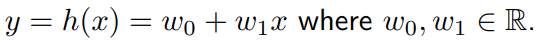

Persamaan di atas adalah fungsi yang memetakan **X** ke **Y** (anggap Y = h(x)), dengan:
- w0 adalah intersep
- w1 adalah koefisien
- x adalah nilai independen
- y adalah nilai dependen

Tentunya, persamaan ini bisa digeneralisasikan untuk banyak nilai x (fitur lebih dari 1) untuk menentukan nilai y. Berikut adalah persamaannya.

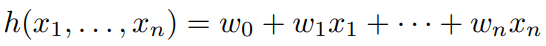

atau

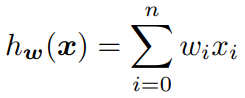

Nilai-nilai parameter seperti w0, w1, w2, wn, dst. inilah yang dicari untuk mendapatkan persamaan/fungsi yang cocok dengan data pada linear regression.

Pencarian didasarkan pada peminimalan error/residual dengan meminimal kan fungsi loss linear regression. J(w) di bawah ini adalah contoh fungsi loss linear regression.

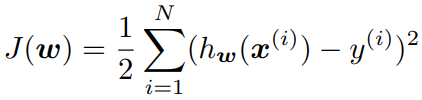

Proses peminimalan fungsi loss disebut dengan gradient descent yang bisa Anda pelajari lebih lanjut dari slide kuliah. :)

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Linear Regression dengan Scikit-learn**

Scikit-learn memiliki modul LinearRegression untuk membuat model linear regression. Di bawah ini adalah contoh implementasinya.

Pada percobaan kali ini, kita akan menggunakan data buatan yang terdiri dari 1 variabel dan 1 target. Hubungan antara variabel dan target dipenuhi oleh fungsi `y = 1+2X`. Nilai-nilai 1 dan 2, secara berurutan dapat dianggap sebagai nilai w0 dan w1.

In [722]:
import numpy as np

# Membuat data buatan dengan beberapa noises yang disengaja

X = np.array([2, 3, 2, 4, 5, 2, 1, 5, 5, 1])
X_train  = X.reshape(-1, 1)
y_train  = np.array([5, 7, 5, 9, 10, 4, 3, 11, 11,  2])

print('X: ', X_train)
print('y: ', y_train)

X:  [[2]
 [3]
 [2]
 [4]
 [5]
 [2]
 [1]
 [5]
 [5]
 [1]]
y:  [ 5  7  5  9 10  4  3 11 11  2]


In [723]:
# Melatih model linear regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

Pada tahap ini, trained model 'linear' telah mengandung informasi (parameter-parameter) yang memenuhi suatu persamaan linear. Hal tersebut dapat kita lihat dengan cara di bawah ini.

In [724]:
# Melihat nilai koefisien dan intersep persamaan linear regression pada trained model
print("Koefisien persamaan linear: \n", linear.coef_)
print("Intersep persamaan linear: \n", linear.intercept_)

Koefisien persamaan linear: 
 [2.04166667]
Intersep persamaan linear: 
 0.5749999999999993


Berdasarkan persamaan linear tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

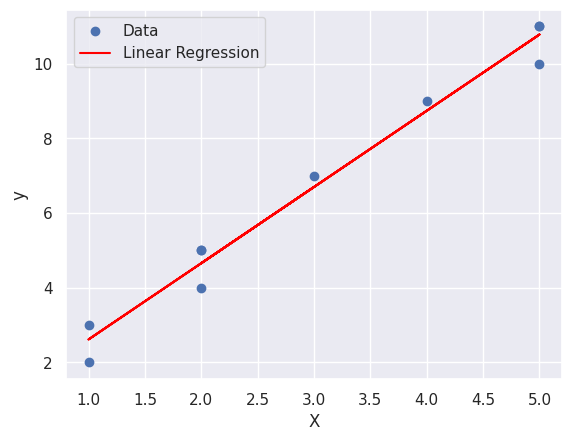

In [725]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred = linear.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred, color='red', label="Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [726]:
# Melakukan percobaan prediksi model linear regression menggunakan data testing buatan

X_test = np.array([[2], [4], [7]])
y_test = np.array([5, 9, 15])

y_predict = linear.predict(X_test)

print(y_predict)

[ 4.65833333  8.74166667 14.86666667]


Hasil prediksi (y_predict) memiliki nilai yang hampir mirip dengan nilai y yang sebenarnya (y_test). Hal ini menandakan model memiliki performa yang baik.

Performa model regresi dapat diukur dengan beberapa metrik evaluasi, contohnya adalah R-squared. Lihat kode di bawah ini.

In [727]:
from sklearn import metrics

# Nilai R-squared
print("R-squared:", metrics.r2_score(y_test, y_predict))

R-squared: 0.9960279605263158


Dari hasil di atas, dapat diketahui bahwa perbedaan antara prediksi dan aktual memiliki nilai yang kecil. Untuk implementasi Linear Regression lebih lanjutnya menggunakan **sklearn** dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

### Ridge and Lasso Regression

Linear regression adalah model yang memiliki ciri high-bias dan low-variance. Biasanya, model seperti ini cenderung tidak overfit. Walau demikian, linear regression masih dapat mengalami overfitting, apalagi pada data yang memiliki banyak fitur (high-dimension).

Untuk mengatasi hal tersebut, diperlukan regularisasi. Pada linear regression, regularisasi adalah teknik untuk meminimalkan fungsi loss dengan penambahan regularization term pada fungsi loss. Dua teknik regularisasi pada linear regression adalah Ridge dan Lasso. Berikut adalah modifikasi fungsi loss linear regression pada ridge dan lasso regression.

- Ridge regression

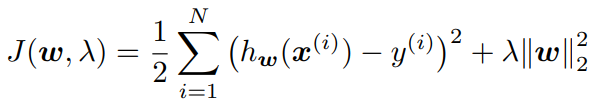

- Lasso Regression

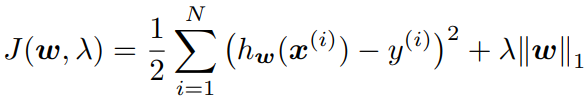

Term tambahan pada fungsi loss tersebut berperan seperti bobot pinalti untuk meminimalkan overfitting. Pada regularization term terdapat parameter λ yang pada sumber lain disebut sebagai α (alpha).

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Ridge dan Lasso Regression dengan Scikit-learn**

Berikut adalah contoh implementasi ridge dan lasso regression menggunakan modul scikit-learn pada dataset housing.

In [728]:
# Melatih model ridge regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=2) # Mengatur hyperparameter alpha=2
ridge.fit(X_train, y_train)

Ridge(alpha=2)

Setelah pelatihan selesai, **ridge** memiliki parameter hasil generalisasi ridge regression dengan memanfaatkan bobot penalti. Parameter yang diperoleh dapat dilihat pada kode berikut ini.

In [729]:
# Melihat nilai koefisien dan intersep persamaan ridge regression pada trained model

print("Koefisien persamaan regresi ridge: \n", ridge.coef_)
print("Intersep persamaan regresi ridge: \n", ridge.intercept_)

Koefisien persamaan regresi ridge: 
 [1.88461538]
Intersep persamaan regresi ridge: 
 1.046153846153846


Berdasarkan persamaan linear pada **ridge** regression tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

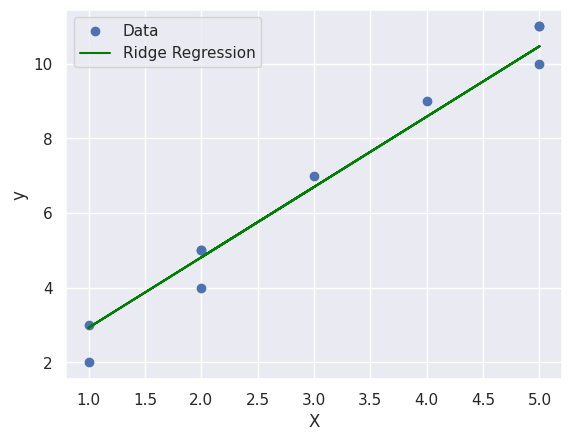

In [730]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred = ridge.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred, color='green', label="Ridge Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

Untuk **lasso** regression, berikut adalah contoh implementasinya.

In [731]:
# Melatih model lasso regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=2) # Mengatur hyperparameter alpha=2
lasso.fit(X_train, y_train)

Lasso(alpha=2)

Setelah pelatihan selesai, **lasso** memiliki parameter hasil generalisasi lasso regression dengan memanfaatkan bobot penalti. Parameter yang diperoleh dapat dilihat pada kode berikut ini.

In [732]:
# Melihat nilai koefisien dan intersep persamaan lasso regression pada trained model

print("Koefisien persamaan regresi lasso: \n", lasso.coef_)
print("Intersep persamaan regresi lasso: \n", lasso.intercept_)

Koefisien persamaan regresi lasso: 
 [1.20833333]
Intersep persamaan regresi lasso: 
 3.075


Berdasarkan persamaan linear pada **lasso** regression tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

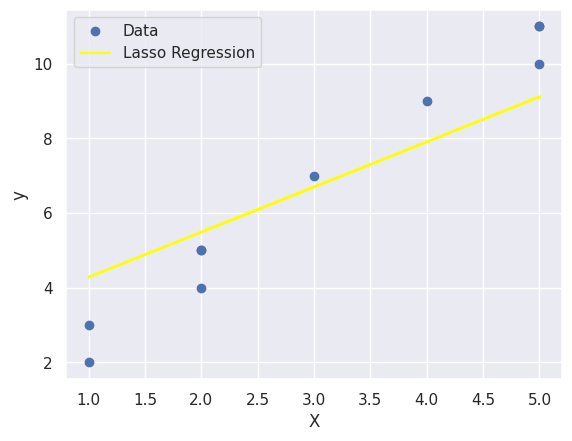

In [733]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred = lasso.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred, color='yellow', label="Lasso Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

Perhatikan plot visualisasi pada ketiga plot berikut ini. Seperti yang sudah disebutkan sebelumnya, model regresi linear memiliki kecenderungan untuk tidak overfit. Untuk itu, penerapan regularisasi melalui bobot penalti tidak memperbaik kinerja dari model pada konteks data sederhana yang kita bentuk.

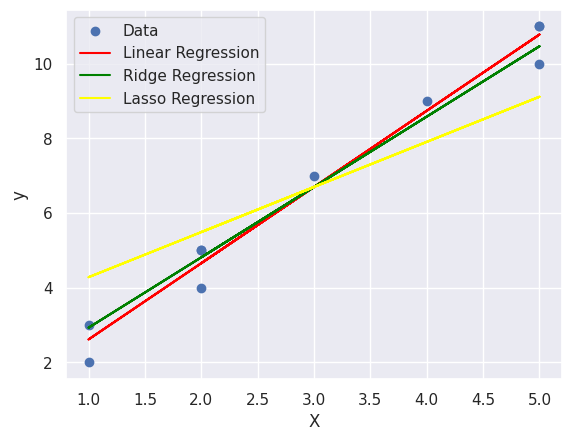

In [734]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred_linear = linear.predict(X_train)
y_pred_ridge = ridge.predict(X_train)
y_pred_lasso = lasso.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred_linear, color='red', label="Linear Regression")
plt.plot(X, y_pred_ridge, color='green', label="Ridge Regression")
plt.plot(X, y_pred_lasso, color='yellow', label="Lasso Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

**NOTE**: Parameter alpha adalah parameter yang merepresentasikan “kekuatan” dari regularisasi yang dilakukan oleh model. Regularisasi adalah teknik modifikasi yang digunakan untuk mengurangi *generalization error*, dengan kata lain menghindari *overfitting*. Hal ini dilakukan dengan memberikan batasan/*constraint* atau penambahan penalti pada parameter/atribut yang kita gunakan. Untuk lebih jelas, silahkan baca dokumentasi model Ridge dan Lasso yang ada pada link berikut : [API Reference — scikit-learn 1.0.1 documentation ](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

Anda dipersilakan untuk mencoba sendiri memprediksi dan mengukur performa model ridge dan lasso regression. Performa mungkin tidak akan jauh berbeda dengan linear regression karena hanya mengunakan data yang sangat kecil. Untuk implementasi lebih lanjutnya menggunakan **sklearn** dapat dilihat pada kedua link berikut:
* [Lasso Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html).
* [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

### Penjelasan Dataset untuk *Linear Regression*, *Lasso Regression*, dan *Ridge Regression*

Dataset yang digunakan pada bagian linear regression, lasso regression, dan ridge regression adalah data harga dan atribut dari sekitar 54000 berlian. Data didapatkan dari Kaggle dengan beberapa perubahan. Berikut penjelasan masing-masing kolom pada data.

- **Price:** Harga berlian dalam satuan dolar AS (\$326 — \$18,823)

- **Carat:** Berat/Bobot berlian (0.2 — 5.01)

- **Cut:** Kualitas potongan berlian (Fair, Good, Very Good, Premium, Ideal)

- **Color:** Kualitas warna berlian, dari J (paling buruk) hingga D (paling baik)

- **Clarity:** Ukuran seberapa jernih berlian (I1 (paling buruk), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (paling baik))

- **X:** Ukuran panjang berlian dalam satuan mm (0 — 10.74)

- **Y:** Ukuran lebar berlian dalam satuan mm (0 — 58.9)

- **Z:** Ukuran kedalaman berlian dalam satuan mm (0 — 31.8)

- **Depth:** Persentase total dari kedalaman berlian =  100 * z / mean(x, y)  (43 — 79)

- **Table:** Lebar bagian atas berlian relatif terhadap titik terlebar (43 — 95)

**Sumber data dan penjelasan:** https://www.kaggle.com/datasets/shivam2503/diamonds
<br/> <br/>
<img src="https://yourdiamondguru.com/wp-content/uploads/2018/09/GIA-Cut-Scale.png" alt="Struktur Berlian"/>

In [735]:
# Import dataset diamonds dan menampilkan 5 row teratas
import pandas as pd

df_diamond = pd.read_csv('diamonds.csv')
df_diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [736]:
# Menampilkan informasi keseluruhan terkait dataset
df_diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


#### Soal 1: Data Preprocessing untuk Regresi

a) Persiapkan data untuk dilatih oleh model regresi.
Pada tahap ini, Anda diminta melakukan persiapan sebelum melakukan training pada model. Berikut adalah persiapan yang `setidaknya` dilakukan sebagai berikut:
- Melakukan encoding pada data kategorikal
- Melakukan feature selection, pilih fitur-fitur yang relevan dalam memprediksi harga berlian (`price`)
- Membagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing.
- Melakukan standarisasi pada data selain data kategorikal. Hint: Standarisasi dilatih terlebih dahulu pada data training, lalu lakukan standarisasi untuk kedua training dan testing set.

##### Check duplicates value and missing data, also outlier

In [737]:
from typing import Literal

# Outlier related

def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

def determine_outlier_thresholds_iqr(dataframe, col_name, th1=0.25, th3=0.75):
    quartile1 = dataframe[col_name].quantile(th1)
    quartile3 = dataframe[col_name].quantile(th3)
    iqr = quartile3 - quartile1
    upper_limit = quartile3 + 1.5 * iqr
    lower_limit = quartile1 - 1.5 * iqr
    return lower_limit, upper_limit

def check_outliers_iqr(dataframe, col_name):
    lower_limit, upper_limit = determine_outlier_thresholds_iqr(dataframe, col_name)
    if dataframe[(dataframe[col_name] > upper_limit) | (dataframe[col_name] < lower_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds_iqr(dataframe, cols, target_value, columns_to_label_encode = [], columns_to_one_hot_encode = [], replace=False):
    from tabulate import tabulate
    data = []
    for col_name in cols:
        if col_name != target_value and (col_name not in columns_to_one_hot_encode) and (col_name not in columns_to_label_encode):
            outliers_ = check_outliers_iqr(dataframe,col_name)
            count = None
            lower_limit, upper_limit = determine_outlier_thresholds_iqr(dataframe, col_name)
            if outliers_:
                count = dataframe[(dataframe[col_name] > upper_limit) | (dataframe[col_name] < lower_limit)][col_name].count()
                if replace:
                    if lower_limit < 0:
                        # We don't want to replace with negative values, right!
                        dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
                    else:
                        dataframe.loc[(dataframe[col_name] < lower_limit), col_name] = lower_limit
                        dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
            outliers_status = check_outliers_iqr(dataframe, col_name)
            data.append([outliers_, outliers_status, count, col_name, lower_limit, upper_limit ])
    table = tabulate(data, headers=['Outliers (Previously)', 'Outliers', 'Count', 'Column', 'Lower Limit', 'Upper Limit'], tablefmt='rst', numalign='right')
    print("Removing Outliers using IQR")
    print(table)


def determine_outlier_thresholds_std(dataframe, col_name):
    upper_boundary = dataframe[col_name].mean() + 3 * dataframe[col_name].std()
    lower_boundary = dataframe[col_name].mean() - 3 * dataframe[col_name].std()
    return lower_boundary, upper_boundary

def check_outliers_std(dataframe, col_name):
    lower_boundary, upper_boundary = determine_outlier_thresholds_std(dataframe, col_name)
    if dataframe[(dataframe[col_name] > upper_boundary) | (dataframe[col_name] < lower_boundary)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds_std(dataframe, cols, target_value, columns_to_label_encode = [], columns_to_one_hot_encode = [], replace=False):
    from tabulate import tabulate
    data = []
    for col_name in cols:
        if col_name != target_value and col_name not in columns_to_one_hot_encode and col_name not in columns_to_label_encode:
            outliers_ = check_outliers_std(dataframe, col_name)
            count = None
            lower_limit, upper_limit = determine_outlier_thresholds_std(dataframe, col_name)
            if outliers_:
                count = dataframe[(dataframe[col_name] > upper_limit) | (dataframe[col_name] < lower_limit)][col_name].count()
                if replace:
                    if lower_limit < 0:
                        # We don't want to replace with negative values, right!
                        dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
                    else:
                        dataframe.loc[(dataframe[col_name] < lower_limit), col_name] = lower_limit
                        dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
            outliers_status = check_outliers_std(dataframe, col_name)
            data.append([outliers_, outliers_status,count, col_name, lower_limit, upper_limit])
    table = tabulate(data, headers=['Outlier (Previously)','Outliers','Count', 'Column','Lower Limit', 'Upper Limit'], tablefmt='rst', numalign='right')
    print("Removing Outliers using 3 Standard Deviation")
    print(table)

def remove_outlier(df, type: Literal['iqr', 'std', "nah"], target_value, columns_to_label_encode, columns_to_one_hot_encode):
  print(dict(check_outlier(df).sum()))
  print("Boxplot Old")
  df.boxplot(vert=False, figsize=(20,20))
  if(type == "iqr"):
    replace_with_thresholds_iqr(df, df.columns, target_value, columns_to_label_encode, columns_to_one_hot_encode, replace=True)
  else:
    replace_with_thresholds_std(df, df.columns, target_value, columns_to_label_encode, columns_to_one_hot_encode, replace = True)


Tidak ditemukan missing value pada dataset
Duplicates value on dataset: 146
Duplicates value on dataset: 0


<ipython-input-737-8e34504938d9>:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-737-8e34504938d9>:7: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-737-8e34504938d9>:15: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < lower_limit) | (df > upper_limit)


Outlier pada tiap atribut:
carat      1873
clarity       0
color         0
cut           0
depth      2525
price      3523
table       604
x            31
y            28
z            48
dtype: int64
{'carat': 1873, 'clarity': 0, 'color': 0, 'cut': 0, 'depth': 2525, 'price': 3523, 'table': 604, 'x': 31, 'y': 28, 'z': 48}
Boxplot Old
Removing Outliers using 3 Standard Deviation
======================  ==========  =======  ========  =============  =============
Outlier (Previously)    Outliers      Count  Column      Lower Limit    Upper Limit
======================  ==========  =======  ========  =============  =============
True                    True            432  carat         -0.622391        2.21795
True                    True            681  depth           57.4584        66.0378
True                    True            335  table           50.7571        64.1591
True                    True             42  x               2.36913         9.0933
True                    True    

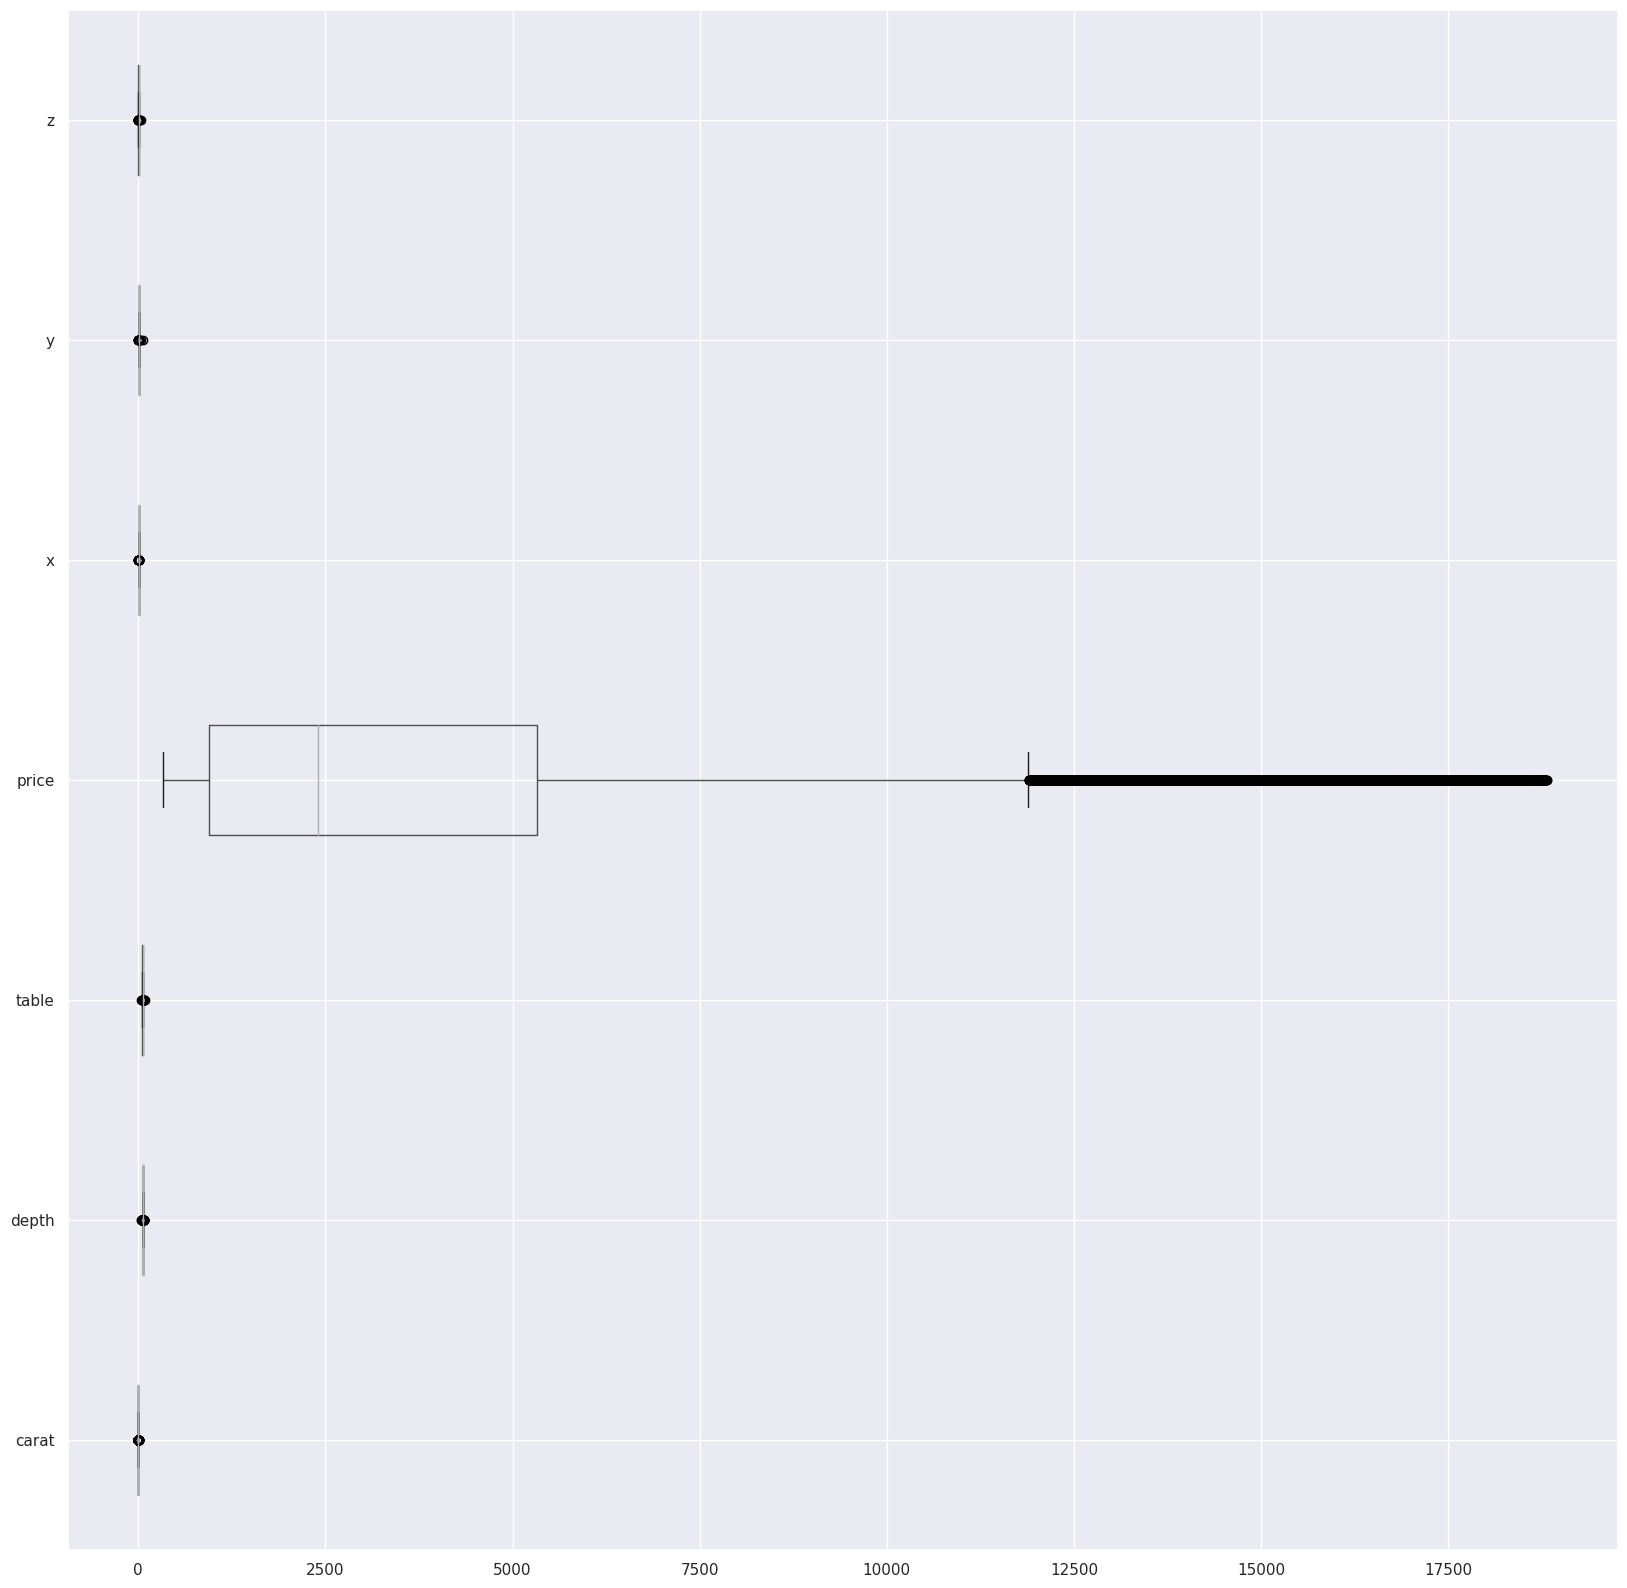

In [738]:
def check_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
    else:
        print(missing_data[missing_data['Total'] > 0])


def preprocess(df, outlier_type, target_value, columns_to_label_encode, columns_to_one_hot_encode):
  check_null(df)

  print("Duplicates value on dataset:", df.duplicated().sum()) # 146 duplicated value, lets try to remove it.

  df.drop_duplicates(inplace=True)

  print("Duplicates value on dataset:", df.duplicated().sum()) # 0 now

  remove_outlier(df, outlier_type, target_value, columns_to_label_encode, columns_to_one_hot_encode)

columns_to_label_encode = ["cut",	"color",	"clarity"]
columns_to_one_hot_encode = [] # because categorical here needs ordinality ordering.

preprocess(df_diamond, "nah", "price", columns_to_label_encode, columns_to_one_hot_encode)

##### Encoding on categorical value

In [739]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [740]:
# Encode categorical value here

encoder_ordering = {
    "cut": {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5},
    "color": {"J": 1, "I": 2, "H": 3, "G": 4, "F": 5, "E": 6, "D": 7},
    "clarity": {"I1": 1, "SI2": 2, "SI1": 3, "VS2": 4, "VS1": 5, "VVS2": 6, "VVS1": 7, "IF": 8},
}

def label_encode_df(df, column_to_encode, encoder_ordering):
  for col in column_to_encode:
    df[col] = df[col].map(encoder_ordering[col])

label_encode_df(df_diamond, columns_to_label_encode, encoder_ordering)

##### Menentukan dependent variable dan independent variables

In [741]:
X_raw = df_diamond.drop(["price"], axis=1)
y     = df_diamond["price"]

##### Melakukan feature selection dan pemilihan fitur

Sebelum mengambil fitur, lebih baik mengecek korelasi atribut lain terhadap atribut price.

In [742]:
import seaborn as sns
sns.set()

<Axes: >

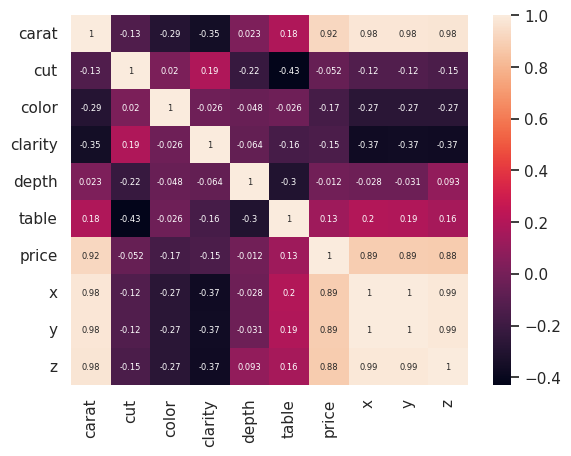

In [743]:
correlation_matrix = df_diamond.corr(method='pearson')

sns.heatmap(correlation_matrix, annot= True, annot_kws={"fontsize":6})

In [744]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

Untuk sekarang saya akan menggunakan 4 fitur relevan (terlihat dari korelasi dimana 4 fitur sangat berkorelasi dengan price) karena tidak dispesifikasikan pada soal mengenai berapa fitur yang perlu diambil.

In [745]:
chosen_k = 7
selector = SelectKBest(f_regression, k=chosen_k)
X = selector.fit_transform(X_raw, y)

In [746]:
print("Jumlah feature (sebelum dilakukan feature selection ) :", X_raw.shape[1])
print("Jumlah feature (setelah dilakukan feature selection ) :", X.shape[1])

Jumlah feature (sebelum dilakukan feature selection ) : 9
Jumlah feature (setelah dilakukan feature selection ) : 7


In [747]:
input_features = selector.feature_names_in_
selector.get_feature_names_out(input_features=input_features)

array(['carat', 'color', 'clarity', 'table', 'x', 'y', 'z'], dtype=object)

##### Membagi dataset menjadi training dan testing

In [748]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [749]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

##### Standarisasi


In [750]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [751]:
def scale_train_and_test(X_train, X_test, categorical_columns):
    """ Ini adalah approach yang dilakukan berdasarkan hint diatas (Standarisasi dilatih terlebihi dahulu pada data training),
      lalu berdasarkan hasilnya standarisasi data training dan testnya.
      Note: tidak dilakukan standarisasi terhadap kolom yang sebelumnya kategorikal
      berdasarkan permintaan soal.
    """
    scaler = StandardScaler()

    num_columns = X_train.shape[1]
    columns_to_scale = list(range(num_columns))

    if categorical_columns:
        # Exclude specified columns from scaling
        columns_to_scale = [col for col in columns_to_scale if col not in categorical_columns]

    scaler.fit(X_train[:, columns_to_scale]) # Pelatihan standarisasi pada data training

    X_train_scaled = X_train.copy()
    X_train_scaled[:, columns_to_scale] = scaler.transform(X_train[:, columns_to_scale])

    X_test_scaled = X_test.copy()
    X_test_scaled[:, columns_to_scale] = scaler.transform(X_test[:, columns_to_scale])

    return X_train_scaled, X_test_scaled

# There are no categorical column to be encoded here.
X_train_scaled, X_test_scaled = scale_train_and_test(X_train, X_test, [])
X_train_scaled

array([[-0.44096143,  0.35016488, -0.63707633, ..., -0.32268199,
        -0.36297057, -0.30118903],
       [-1.06411041, -2.0025823 , -0.03074287, ..., -1.31679073,
        -1.35502229, -1.18414697],
       [ 0.67640916,  0.35016488, -0.63707633, ...,  0.8415895 ,
         0.86356609,  0.78441499],
       ...,
       [-1.04262251,  0.35016488, -0.63707633, ..., -1.27201105,
        -1.30992903, -1.19862169],
       [ 0.89128811, -0.82620871, -0.03074287, ...,  0.95801665,
         0.917678  ,  1.04495996],
       [-0.54840091,  1.52653847,  1.18192403, ..., -0.43015321,
        -0.41708249, -0.43146151]])

#### Soal 2: Linear Regression

a) Buatlah sebuah model regresi linear berdasarkan fitur-fitur yang terpilih sebelumnya dengan `price` sebagai target prediksi. Tampilkan hasil prediksinya pada keseluruhan data uji.

In [752]:
linear = LinearRegression()

linear.fit(X_train_scaled, y_train)

# Melihat nilai koefisien dan intersep persamaan linear regression pada trained model
print("Koefisien persamaan linear: \n", linear.coef_)
print("Intersep persamaan linear: \n", linear.intercept_)

y_predict = linear.predict(X_test_scaled)

print("Prediksi:", y_predict)

Koefisien persamaan linear: 
 [ 5892.88725205   557.6910174    815.38062289  -119.72184638
 -1858.42073934  1253.90012699 -1177.94862747]
Intersep persamaan linear: 
 3920.7687231323343
Prediksi: [-127.07182314  860.69344855 7631.40895021 ... 5570.41207894 5920.70799381
  624.98848272]


b) Visualisasikan kinerja model regresi linear yang sudah dipilih sebelumnya pada keseluruhan data uji. Hint: dapat memanfaatkan visualisasi perbandingan hasil prediksi dengan aktual (Prediction Error Plot) atau dapat memanfaatkan Residuals Plot!

###### Prediction Error Plot & Residuals Plot

In [753]:
from sklearn.metrics import mean_squared_error
from scipy.stats import zscore

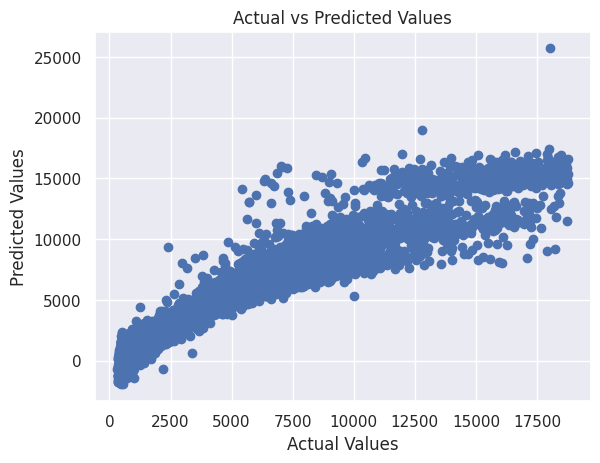

In [754]:
# Create a scatter plot of predicted vs actual values
plt.scatter(y_test, y_predict)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

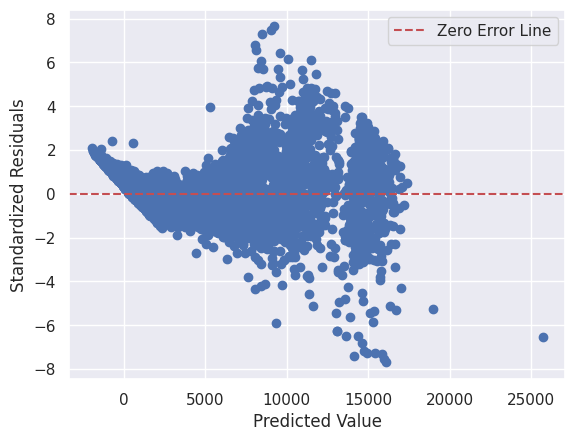

In [755]:
errors = y_test - y_predict

# Calculate standardized residuals
std_residuals = zscore(errors)

plt.scatter(y_predict, std_residuals)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Error Line')
plt.xlabel('Predicted Value')
plt.ylabel('Standardized Residuals')
plt.legend()
plt.show()

c) Tampilkan nilai dari R squared yang dihasilkan dengan menggunakan **cross validation** untuk mendapatkan performa kinerja sebenarnya menggunakan data latih yang ada.

> Catatan: Jumlah split dibebaskan.

Jumlah split yang digunakan adalah 5

In [756]:
def r2_cv(model, X, y):
    r2 = make_scorer(r2_score)
    r2_val = cross_val_score(model, X, y, cv=5, scoring=r2)
    return np.mean(r2_val)

In [757]:
from sklearn.metrics import make_scorer, r2_score

def r2_cv(model, X, y):
    r2 = make_scorer(r2_score)
    r2_val = cross_val_score(model, X, y, cv=5, scoring='r2')
    return np.mean(r2_val)

# Calculate R-squared with cross-validation
r2_cv_score = r2_cv(linear, X_train_scaled, y_train)

print("Cross-validated R-squared:", r2_cv_score)

Cross-validated R-squared: 0.9163009881746284


#### Soal 3: Lasso Regression

Ikuti langkah-langkah di bawah ini. **Gunakan training dan testing set yang sama dengan Linear Regression**.

a) Buatlah sebuah list alpha yang berisi minimal 5 buah alpha.

In [758]:
alphas = [i for i in range(2,101, 9)]

b) Buatlah (fit) model regresi lasso berdasarkan fitur-fitur yang terpilih di awal sebanyak nilai alpha yang telah ditentukan.

In [759]:
from sklearn.pipeline import make_pipeline
predictions_lasso = []

for alpha in alphas:
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train_scaled, y_train)

  y_test_pred = lasso.predict(X_test_scaled)

  predictions_lasso.append([y_test_pred, alpha])

c) Tampilkan nilai MAE, MSE, RMSE, dan R-squared untuk masing-masing model lasso regression pada testing set

In [760]:
def evaluate_metric(y_test, y_predict):
  print("MSE:", metrics.mean_squared_error(y_test, y_predict))
  print("MAE:", metrics.mean_absolute_error(y_test, y_predict))
  print("RMSE:", metrics.mean_squared_error(y_test, y_predict, squared=False))
  print("R-squared:", metrics.r2_score(y_test, y_predict))
  print("\n" + "#"*60 + "\n")

def showing_metric_evaluation(predictions, modelName):
  print(f"Model {modelName}\n")
  for y_test_pred, alpha in predictions:
    print('Metric Evaluation with alpha = %s' % (alpha))
    evaluate_metric(y_test, y_test_pred)

showing_metric_evaluation(predictions_lasso, "Lasso Regression")

Model Lasso Regression

Metric Evaluation with alpha = 2
MSE: 1399919.685456285
MAE: 790.6861604783485
RMSE: 1183.18201704399
R-squared: 0.9138024398067912

############################################################

Metric Evaluation with alpha = 11
MSE: 1406240.5397689831
MAE: 801.8866870349467
RMSE: 1185.8501337728064
R-squared: 0.9134132444652643

############################################################

Metric Evaluation with alpha = 20
MSE: 1431446.3701184345
MAE: 819.9512336542725
RMSE: 1196.43067919476
R-squared: 0.9118612403743593

############################################################

Metric Evaluation with alpha = 29
MSE: 1470269.3856661173
MAE: 840.2564706604196
RMSE: 1212.5466529854089
R-squared: 0.9094707823685755

############################################################

Metric Evaluation with alpha = 38
MSE: 1517087.1879066888
MAE: 861.3894320957584
RMSE: 1231.7009328187946
R-squared: 0.9065880596176413

#################################################

d) Pilih model terbaik berdasarkan nilai R-squared yang ditampilkan.

Berdasarkan analisis saya diatas, pemilihan model terbaik nilai R-squared dapat dilihat dari nilai alpha paling kecil karena dapat dilihat bahwa semakin menambahnya alpha pada lasso regression, nilai r-squared juga akan semakin menurun.

In [761]:
# Sehingga menggunakan alpha = 2

best_lasso = Lasso(alpha=2)
best_lasso.fit(X_train_scaled, y_train)

print("Koefisien persamaan regresi lasso dengan R-squared terbaik: \n", best_lasso.coef_)
print("Intersep persamaan regresi lasso dengan R-squared terbaik: \n", best_lasso.intercept_)

Koefisien persamaan regresi lasso dengan R-squared terbaik: 
 [ 5795.97127217   554.90421002   821.93526896  -122.03357182
  -642.3266624     41.0337557  -1082.94751399]
Intersep persamaan regresi lasso dengan R-squared terbaik: 
 3920.768723132334


e) Tampilkan array hasil prediksi dari model regresi lasso yang terpilih pada keseluruhan data uji.

In [762]:
y_test_pred = best_lasso.predict(X_test_scaled)

y_test_pred

array([-108.4439479 ,  816.60175593, 7598.66657005, ..., 5522.96868766,
       5905.20674464,  646.91385389])

f)  Visualisasikan kinerja model regresi lasso yang sudah dipilih sebelumnya pada keseluruhan data uji. Hint: dapat memanfaatkan visualisasi perbandingan hasil prediksi dengan aktual (Prediction Error Plot) atau dapat memanfaatkan Residuals Plot!

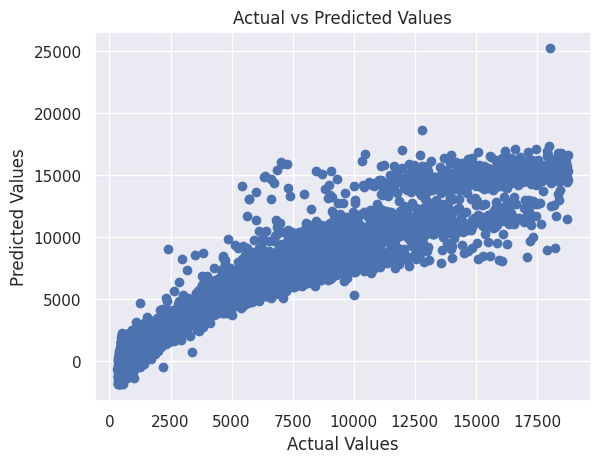

In [763]:
# Create a scatter plot of predicted vs actual values
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

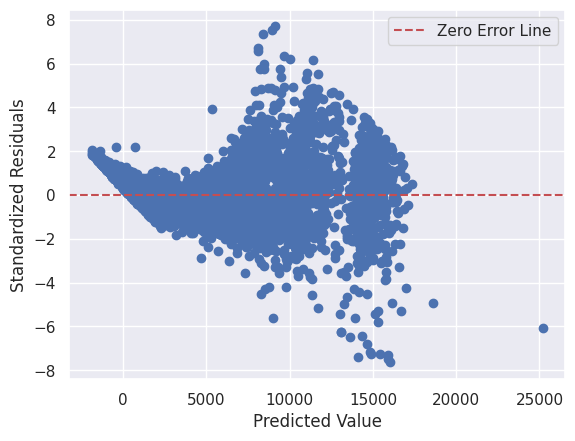

In [764]:
errors = y_test - y_test_pred

# Calculate standardized residuals
std_residuals = zscore(errors)

plt.scatter(y_test_pred, std_residuals)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Error Line')
plt.xlabel('Predicted Value')
plt.ylabel('Standardized Residuals')
plt.legend()
plt.show()

g) Berikan analisis hubungan perubahan nilai parameter alpha dengan kualitas hasil regresi berdasarkan nilai R-squared

Berdasarkan analisis di atas, semakin besar nilai alpha pada model lasso regression maka nilai R-squared yang dihasilkan untuk masing-masing model semakin menurun. Hal ini terjadi karena peningkatan nilai alpha akan mengarah pada peningkatan regularisasi. Lasso Regression menggunakan regularisasi L1, yang melibatkan penambahan jumlah tertentu dari bobot fitur ke fungsi biaya yang dioptimalkan oleh model. Dengan meningkatkan nilai alpha, kita memberikan hukuman yang lebih besar pada koefisien yang lebih kecil, dan oleh karena itu, model cenderung memiliki lebih banyak koefisien yang dinyatakan sebagai nol. R-squared adalah ukuran sejauh mana model kita dapat menjelaskan variasi dalam data. Dengan memaksa beberapa koefisien menjadi nol, model dapat kehilangan kemampuannya untuk memodelkan variasi yang mungkin terkandung dalam fitur yang diabaikan.

#### Soal 4: Ridge Regression

Ikuti langkah-langkah di bawah ini. **Gunakan training dan testing set yang sama dengan Linear Regression**.

a) Buatlah sebuah list alpha yang berisi minimal 5 buah alpha.

In [765]:
alphas = [i for i in range(1,52,5)]

b) Buatlah (fit) model regresi ridge berdasarkan fitur-fitur yang terpilih di awal sebanyak nilai alpha yang telah ditentukan.

In [766]:
predictions_ridge = []

for alpha in alphas:
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_train_scaled, y_train)

  y_test_pred = ridge.predict(X_test_scaled)

  predictions_ridge.append([y_test_pred, alpha])

c) Tampilkan nilai MAE, MSE, RMSE, dan R-squared untuk masing-masing model ridge regression pada testing set

In [767]:
showing_metric_evaluation(predictions_ridge, "Ridge Regression")

Model Ridge Regression

Metric Evaluation with alpha = 1
MSE: 1393102.735610295
MAE: 789.624698738382
RMSE: 1180.2977317652928
R-squared: 0.9142221813468155

############################################################

Metric Evaluation with alpha = 6
MSE: 1393132.8822068032
MAE: 789.8950579288678
RMSE: 1180.3105024555205
R-squared: 0.9142203251238521

############################################################

Metric Evaluation with alpha = 11
MSE: 1393199.9141140236
MAE: 790.1992673741476
RMSE: 1180.3388979924466
R-squared: 0.9142161977536054

############################################################

Metric Evaluation with alpha = 16
MSE: 1393296.2324046537
MAE: 790.5302243620627
RMSE: 1180.3796984041421
R-squared: 0.914210267126484

############################################################

Metric Evaluation with alpha = 21
MSE: 1393417.049890574
MAE: 790.87737414175
RMSE: 1180.4308746769436
R-squared: 0.9142028280050664

###################################################

d) Pilih model terbaik berdasarkan nilai R-squared yang ditampilkan.

In [768]:
# Berdasarkan hasil diatas, model terbaik berdasarkan nilai R-squared adalah alpha = 1

best_ridge = Ridge(alpha=1)
best_ridge.fit(X_train_scaled, y_train)

print("Koefisien persamaan regresi ridge dengan R-squared terbaik: \n", best_ridge.coef_)
print("Intersep persamaan regresi ridge dengan R-squared terbaik: \n", best_ridge.intercept_)

Koefisien persamaan regresi ridge dengan R-squared terbaik: 
 [ 5888.36111258   557.59820951   815.54559722  -119.80852449
 -1834.96514921  1233.17803292 -1176.16483108]
Intersep persamaan regresi ridge dengan R-squared terbaik: 
 3920.7687231323343


e) Tampilkan array hasil prediksi dari model regresi ridge yang terpilih pada keseluruhan data uji.

In [769]:
y_test_pred = best_ridge.predict(X_test_scaled)

y_test_pred

array([-127.19353547,  859.16592557, 7631.09355063, ..., 5569.93972995,
       5920.84207994,  624.75228651])

f)  Visualisasikan kinerja model regresi ridge yang sudah dipilih sebelumnya pada keseluruhan data uji. Hint: dapat memanfaatkan visualisasi perbandingan hasil prediksi dengan aktual (Prediction Error Plot) atau dapat memanfaatkan Residuals Plot!

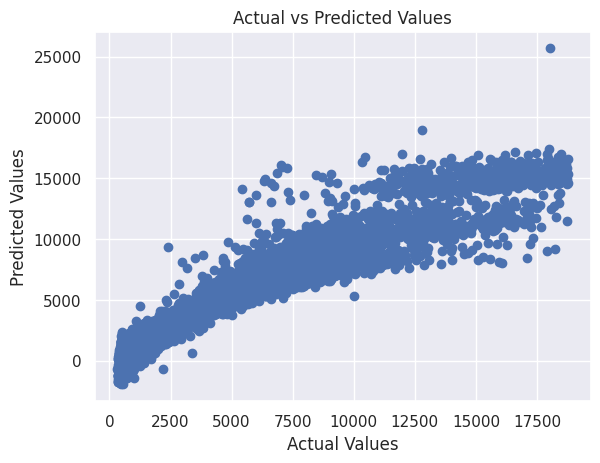

In [770]:
# Create a scatter plot of predicted vs actual values
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

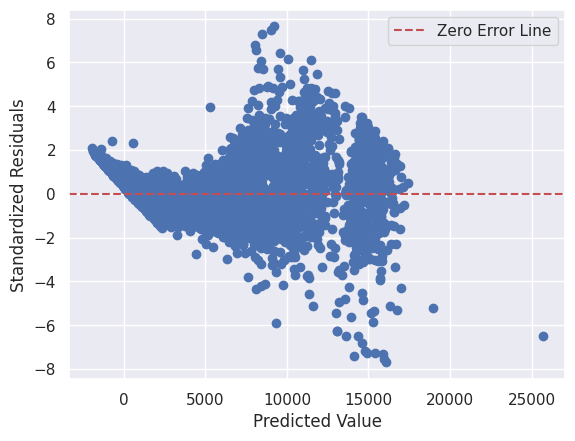

In [771]:
errors = y_test - y_test_pred

# Calculate standardized residuals
std_residuals = zscore(errors)

plt.scatter(y_test_pred, std_residuals)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Error Line')
plt.xlabel('Predicted Value')
plt.ylabel('Standardized Residuals')
plt.legend()
plt.show()

g) Berikan analisis hubungan perubahan nilai parameter alpha dengan kualitas hasil regresi berdasarkan nilai R-squared

Berdasarkan analisis di atas, semakin besar nilai alpha pada model ridge regression maka nilai R-squared yang dihasilkan pada **data training** untuk masing-masing model semakin menurun. Dengan menambahkan hukuman pada nilai kuadrat koefisien, Ridge Regression akan mengurangi koefisien secara keseluruhan. Ini menyebabkan model mencegah overfitting. Disisi lain hal ini menyebabkan penurunan kemampuan model untuk melakukan **fitting** data pelatihan sepenuhnya

h) Jelaskan mengapa lasso regression dapat dijadikan model untuk feature selection, sedangkan ridge regression tidak?

Lasso Regression: Lasso regression menggunakan penalti L1, yang dapat mengurangi koefisien beberapa fitur menjadi nol. Ini berarti bahwa lasso regression dapat sepenuhnya menghilangkan fitur-fitur tersebut dari model. Oleh karena itu, lasso regression melakukan regularisasi dan feature selection secara bersamaan.

Ridge Regression: Di sisi lain, ridge regression menggunakan penalti L2, yang mengurangi semua koefisien dengan jumlah kecil tetapi tidak pernah benar-benar mengurangi koefisien apa pun menjadi nol. Ini berarti bahwa ridge regression tidak menghilangkan fitur apa pun dari model, sehingga tidak dapat digunakan untuk feature selection.

### Logistic Regression

Logistic regression adalah model linear yang hanya memiliki dua nilai output: 0 atau 1. Oleh karena itu logistic regression lebih cocok dianggap sebagai classifier daripada regressor. Contoh visualisasinya adalah sebagai berikut.

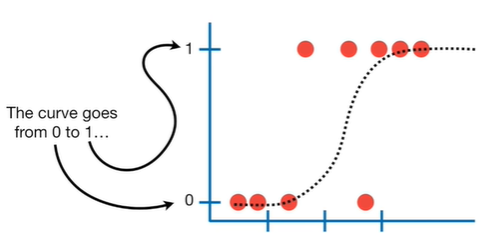

Sumber: https://youtu.be/yIYKR4sgzI8?t=222

Untuk mendapatkan kurva seperti pada gambar, berikut adalah persamaan logistic regression yang memenuhi.

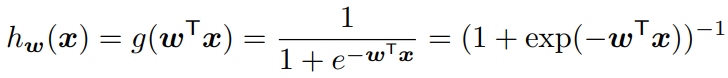

Berbeda dengan model linear, ridge, dan lasso regression yang meminimalkan fungsi loss. Pada logistic regression dilakukan proses memaksimalkan fungsi likelihood untuk menemukan parameter yang cocok dengan data.

Hal ini karena logistic regression merupakan metode klasifikasi. Sehingga, alih-alih meminimalkan perbedaan hasil prediksi, di sini memaksimalkan persamaan hasil prediksi dengan aktual.

Fungsi/persamaan likelihood dimaksimalkan melalui proses yang disebut dengan gradient ascent (tentunya bisa dipelajari sendiri dari slide :D). Berikut adalah persamaan likelihood tersebut.

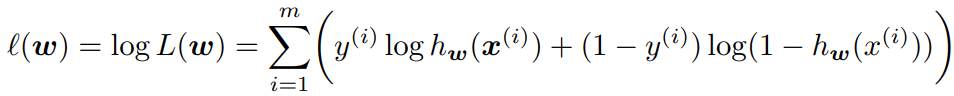

**Sumber gambar (persamaan) dan penjelasan lebih detail:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

Untuk implementasi Logistic Regression menggunakan **sklearn** lebih lanjutnya dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

**Logistic regression** dengan Scikit-learn

Pada bagian ini kita melatih model logistic regression menggunakan modul dari scikit-learn. Kita dapat membentuk data buatan sederhana dan melihat decision boundary yang dihasilkan. Kali ini target hanya berisi nilai 0 atau 1.


In [772]:
# Membentuk data buatan
x1  = np.array([2, 3, 2, 4, 5, 2, 1, 5, 5, 7])
x2  = np.array([3, 4, 2, 3, 5, 6, 7, 4, 3, 6])

X_train = np.stack((x1, x2), axis=1)
y_logistic_train   = np.array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1])

print('X: ', X_train)
print('y: ', y_logistic_train)

X:  [[2 3]
 [3 4]
 [2 2]
 [4 3]
 [5 5]
 [2 6]
 [1 7]
 [5 4]
 [5 3]
 [7 6]]
y:  [0 0 0 1 1 0 0 1 1 1]


In [773]:
# Melatih model logistic regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_logistic_train)

LogisticRegression()

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [774]:
# Melakukan percobaan prediksi model logistic regression menggunakan data testing buatan

X_test = np.array([[2, 5], [3, 6]])
y_test = np.array([0, 1])

y_logistic_predict = logistic.predict(X_test)

print(y_logistic_predict)

[0 0]


Selanjutnya, kita dapat melihat decision boundary yang dihasilkan oleh model tersebut.

In [775]:
# Mendapatkan intercept dan koefisien sebagai w0, w1, dan w2
logistic.intercept_, logistic.coef_
weights = [logistic.intercept_[0],logistic.coef_[0,0], logistic.coef_[0,1]]
print(weights)

[-4.475384273860628, 1.404075585690601, -0.12235462027224138]


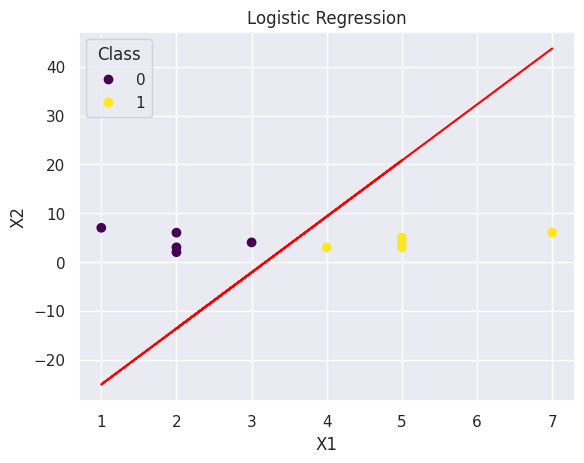

In [776]:
# Plotting the decision boundary
x2_test = (-weights[0] - (weights[1] * x1)) / weights[2]
plt.title('Logistic Regression')
plt.xlabel('X1')
plt.ylabel('X2')
scatter = plt.scatter(x1, x2, c=y_logistic_train, cmap='viridis')
plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Class')
plt.plot(x1, x2_test, color='red', label='Decision Boundary')
plt.show()

Untuk mengevaluasi performa logistic regression, tentunya berbeda dengan linear, ridge, maupun lasso regression. Hasil prediksi model logistic regression dievaluasi selayaknya model klasifikasi. Contohnya dengan akurasi.

Melihat hasil prediksi di atas, kita dapat tahu bahwa model hanya berhasil memprediksi benar sebanyak satu saja. Oleh karena itu, nilai akurasi model logistic regression yang telah kita latih adalah sebesar 0.5.

In [777]:
# Menampilkan rata-rata akurasi
print("Nilai rata-rata akurasi:", logistic.score(X_test, y_test))

Nilai rata-rata akurasi: 0.5


### Penjelasan Dataset untuk *Logistic Regression*

Dataset yang digunakan pada bagian logistic regression adalah data terkait *diabetes*. Data didapatkan dari Kaggle dengan beberapa perubahan. Berikut penjelasan masing-masing kolom pada data.

- **gender**: jenis kelamin biologis seseorang, yang dapat berdampak pada kerentanan mereka terhadap diabetes.

- **age**: usia, berkisar antara 0-80 tahun.

- **hypertension**: hipertensi (kondisi medis di mana tekanan darah di arteri terus meningkat). 0 = tidak menderita hipertensi, sedangkan 1 = menderita hipertensi.

- **heart_disease**: penyakit jantung. 0 = tidak menderita penyakit jantung, sedangkan 1 = menderita penyakit jantung.

- **smoking_history**: riwayat merokok, ada 6 kategori yaitu: not current,former, No Info, current, never, ever.

- **bmi**: Body Mass Index (pengukuran lemak tubuh berdasarkan berat dan tinggi badan). Kisaran BMI pada dataset adalah 10,16 hingga 71,55. BMI kurang dari 18,5 berarti kurus, 18,5-24,9 normal, 25-29,9 kelebihan berat badan, dan 30 atau lebih berarti obesitas.

- **HbA1c_level**: Tingkat HbA1c (Hemoglobin A1c) ( ukuran rata-rata kadar gula darah seseorang selama 2-3 bulan terakhir)

- **blood_glucose_level**: Tingkat glukosa pada darah.

- **diabetes**: diabetes, 0 = tidak terindikasi diabetes, sedangkan 1 = terindikasi hipertensi.


**Sumber data dan penjelasan:** https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [778]:
import pandas as pd

# Import dataset diabetes dan menampilkan 5 row teratas
df_diabetes = pd.read_csv('diabetes_prediction_dataset.csv')
df_diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Male,48.0,0,0,ever,27.32,6.2,145,0
1,Female,44.0,0,1,ever,31.92,6.1,100,0
2,Female,61.0,0,0,No Info,27.32,4.8,159,0
3,Female,71.0,1,0,never,23.96,4.5,85,0
4,Female,51.0,0,0,current,28.49,6.1,200,0


In [779]:
# Menampilkan informasi keseluruhan terkait dataset
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               17000 non-null  object 
 1   age                  17000 non-null  float64
 2   hypertension         17000 non-null  int64  
 3   heart_disease        17000 non-null  int64  
 4   smoking_history      17000 non-null  object 
 5   bmi                  17000 non-null  float64
 6   HbA1c_level          17000 non-null  float64
 7   blood_glucose_level  17000 non-null  int64  
 8   diabetes             17000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 1.2+ MB


#### Soal 5: Logistic Regression

a) Lakukan encoding pada data kategorikal di dataset dan bagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing.

In [780]:
def one_hot_encode_df(df, column_to_one_hot_encode):
  new_df = pd.get_dummies(data=df, columns=column_to_one_hot_encode)
  return new_df

In [781]:
encoder_ordering = {
    "smoking_history": {"not current": 1, "former": 2, "No Info": 3, "current": 4, "never": 5, "ever": 6},
}

columns_to_label_encode = ["smoking_history"]
columns_to_one_hot_encode = ["gender"]

label_encode_df(df_diabetes, columns_to_label_encode, encoder_ordering)
df_diabetes = one_hot_encode_df(df_diabetes, columns_to_one_hot_encode)

X = df_diabetes.drop(["diabetes"], axis=1) # Independen
y = df_diabetes["diabetes"] # Dependen

In [782]:
X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(X, y, test_size = 0.2, stratify=y,random_state = 123)

X_diabetes_train

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male
10749,58.0,0,1,2,32.61,7.5,159,0,1
12589,47.0,0,0,3,27.32,7.0,300,0,1
10027,56.0,0,0,1,27.32,6.1,145,0,1
3496,18.0,0,0,5,18.08,6.6,200,1,0
14497,64.0,0,1,2,32.61,6.6,145,0,1
...,...,...,...,...,...,...,...,...,...
1954,28.0,0,0,3,27.32,5.0,200,1,0
12899,60.0,0,0,5,43.16,9.0,260,1,0
7624,8.0,0,0,3,27.32,4.8,145,1,0
5505,9.0,0,0,5,27.32,6.1,159,0,1


b) Buatlah suatu model logistic regression berdasarkan data asli serta tampilkan `confusion matrix` dan `hasil evaluasi metriknya` pada testing set.

> Catatan: Jika menemukan warning `ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT`, atur parameter max_iter pada LogisticRegression untuk menambah banyak iterasi agar algoritma dapat melakukan proses konvergensi dengan baik.

>`hasil evaluasi metriknya` mencakup:
* F1 Macro Average,
* F1 Micro Average,
* Precision Macro Average
* Precision Micro Average
* Recall Macro Average
* Recall Micro Average

In [783]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score


def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Hasil Evaluasi metricnya: ")
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [784]:
logistic = LogisticRegression(max_iter = 1000)
logistic.fit(X_diabetes_train, y_diabetes_train)

y_logistic_predict = logistic.predict(X_diabetes_test)

evaluate_classifier_performance(y_logistic_predict, y_diabetes_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1700
           1       0.89      0.88      0.88      1700

    accuracy                           0.88      3400
   macro avg       0.88      0.88      0.88      3400
weighted avg       0.88      0.88      0.88      3400



Confusion Matrix



prediction,0,1
actual,,
0,1513,187
1,207,1493




Hasil Evaluasi metricnya: 
F1 Macro Average: 0.8841136371500744
F1 Micro Average: 0.8841176470588236
Precision Macro Average: 0.8841708194905868
Precision Micro Average: 0.8841176470588236
Recall Macro Average: 0.8841176470588236
Recall Micro Average: 0.8841176470588236



c) Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal. Latih terlebih dahulu scaler menggunakan training set, lalu scale untuk kedua training dan testing set

In [785]:
from sklearn.preprocessing import MinMaxScaler

def scale_train_and_test_df(X_train, X_test, exclude_columns=None):
    """Scale the training and test data with optional exclusion of specific columns."""
    scaler = MinMaxScaler()

    columns_to_scale = X_train.columns

    if exclude_columns:
        # Exclude specified columns from scaling
        columns_to_scale = [col for col in columns_to_scale if col not in exclude_columns]

    scaler.fit(X_train[columns_to_scale])

    X_train_scaled = X_train.copy()
    X_train_scaled[columns_to_scale] = scaler.transform(X_train[columns_to_scale])

    X_test_scaled = X_test.copy()
    X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

    return X_train_scaled, X_test_scaled, scaler

In [786]:
exclude_cols = ['smoking_history', 'gender_Female', 'gender_Male']

X_diabetes_train_scaled, X_diabetes_test_scaled, _ = scale_train_and_test_df(X_diabetes_train, X_diabetes_test, exclude_columns=exclude_cols)

X_diabetes_train_scaled

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male
10749,0.724725,0.0,1.0,2,0.297279,0.727273,0.359091,0,1
12589,0.587087,0.0,0.0,3,0.224574,0.636364,1.000000,0,1
10027,0.699700,0.0,0.0,1,0.224574,0.472727,0.295455,0,1
3496,0.224224,0.0,0.0,5,0.097581,0.563636,0.545455,1,0
14497,0.799800,0.0,1.0,2,0.297279,0.563636,0.295455,0,1
...,...,...,...,...,...,...,...,...,...
1954,0.349349,0.0,0.0,3,0.224574,0.272727,0.545455,1,0
12899,0.749750,0.0,0.0,5,0.442276,1.000000,0.818182,1,0
7624,0.099099,0.0,0.0,3,0.224574,0.236364,0.295455,1,0
5505,0.111612,0.0,0.0,5,0.224574,0.472727,0.359091,0,1


d) Buatlah suatu model logistic regression berdasarkan data yang telah dinormalisasi serta tampilkan `confusion matrix` dan `hasil evaluasi metriknya` pada testing set.

> Catatan: Jika menemukan warning `ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT`, atur parameter max_iter untuk menambah banyak iterasi agar algoritma dapat melakukan proses konvergensi dengan baik.

>`hasil evaluasi metriknya` mencakup:
* F1 Macro Average,
* F1 Micro Average,
* Precision Macro Average
* Precision Micro Average
* Recall Macro Average
* Recall Micro Average

In [787]:
logistic = LogisticRegression(max_iter = 1000)
logistic.fit(X_diabetes_train_scaled, y_diabetes_train)

y_logistic_predict = logistic.predict(X_diabetes_test_scaled)

evaluate_classifier_performance(y_logistic_predict, y_diabetes_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1700
           1       0.89      0.88      0.89      1700

    accuracy                           0.89      3400
   macro avg       0.89      0.89      0.89      3400
weighted avg       0.89      0.89      0.89      3400



Confusion Matrix



prediction,0,1
actual,,
0,1514,186
1,202,1498




Hasil Evaluasi metricnya: 
F1 Macro Average: 0.8858798257124034
F1 Micro Average: 0.8858823529411765
Precision Macro Average: 0.8859165379355403
Precision Micro Average: 0.8858823529411765
Recall Macro Average: 0.8858823529411766
Recall Micro Average: 0.8858823529411765



e) Dari kedua model yang dibangun dengan data yang di normalisasi dan data yang tidak dinormalisasi, manakah yang memberikan performa terbaik? berikan analisis mengenai hal tersebut.

Dari kedua model yang dibangun dengan data yang dinormalisasi dan tidak dinormalisasi, model yang memberikan performa terbaik adalah **data yang dinormalisasi**. Hal ini terjadi karena normalisasi membantu mengurangi bias yang disebabkan oleh skala fitur yang berbeda. Dengan kata lain, fitur dengan skala yang lebih besar tidak akan mendominasi fitur dengan skala yang lebih kecil, yang dapat menyebabkan model menjadi bias. Oleh karena itu, normalisasi membantu memastikan bahwa setiap fitur memiliki pengaruh yang proporsional terhadap model regresi logistik, sehingga meningkatkan prediksi klasifikasi

### Softmax Regression

Softmax regression adalah model yang merupakan modifikasi dari logistic regression. Pada model ini, output dapat memiliki nilai lebih dari dua buah. Sehingga, softmax regression disebut sebagai multiclass classification.

Persamaan softmaxe regression:

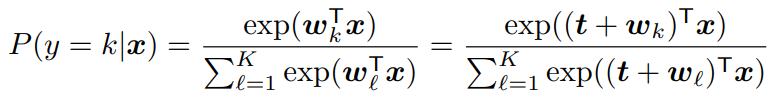

Persamaan likelihood softmaxe regression:

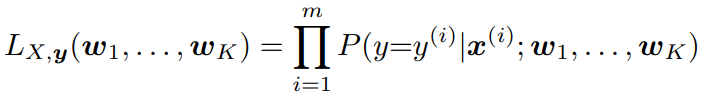

Proses memaksimalkan persamaan likelihood juga sama seperti pada logistic regression, yaitu dengan gradient ascent.

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

Untuk implementasi Softmax Regression menggunakan **sklearn** lebih lanjutnya dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

**Softmax regression dengan Scikit-learn**

Pada bagian ini kita melatih model softmax regression menggunakan modul dari scikit-learn. Softmax regression pada scikit-learn terdapat pada modul logistic regression dengan pengaturan hyperparameter 'multi_class' menjadi 'multinominal'.

Kita dapat membentuk data buatan sederhana dan melihat decision boundary yang dihasilkan. Kali ini target hanya berisi nilai 0, 1, dan 2.

In [788]:
# Membentuk data buatan
x1  = np.array([2, 3, 2, 4, 5, 2, 1, 5, 5, 7])
x2  = np.array([3, 6, 2, 3, 5, 6, 3, 4, 3, 6])

X_train = np.stack((x1, x2), axis=1)
y_softmax_train   = np.array([0, 1, 0, 2, 2, 1, 0, 2, 2, 2])

print('X: ', X_train)
print('y: ', y_softmax_train)

X:  [[2 3]
 [3 6]
 [2 2]
 [4 3]
 [5 5]
 [2 6]
 [1 3]
 [5 4]
 [5 3]
 [7 6]]
y:  [0 1 0 2 2 1 0 2 2 2]


In [789]:
# Melatih model softmax regression menggunakan Scikit-learn pada training set

softmax = LogisticRegression(multi_class='multinomial')
softmax.fit(X_train, y_softmax_train)

LogisticRegression(multi_class='multinomial')

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [790]:
# Melakukan percobaan prediksi model softmax regression menggunakan data testing buatan

X_test = np.array([[2, 3], [7, 5]])
y_softmax_test = np.array([0, 2])

y_logistic_predict = softmax.predict(X_test)

print(y_logistic_predict)

[0 2]


Selanjutnya, kita dapat melihat decision boundary yang dihasilkan oleh model tersebut. w0, w1, dan w2 yang dihasilkan masing-masing memiliki 3 nilai yang merepresentasikan tiap boundary.

In [791]:
# Mendapatkan intercept dan koefisien sebagai w0, w1, dan w2.
softmax.intercept_, softmax.coef_
print(softmax.intercept_, softmax.coef_)

[ 4.69333009 -2.77478855 -1.91854154] [[-0.7077521  -0.62923839]
 [-0.31769488  0.84892058]
 [ 1.02544698 -0.21968219]]


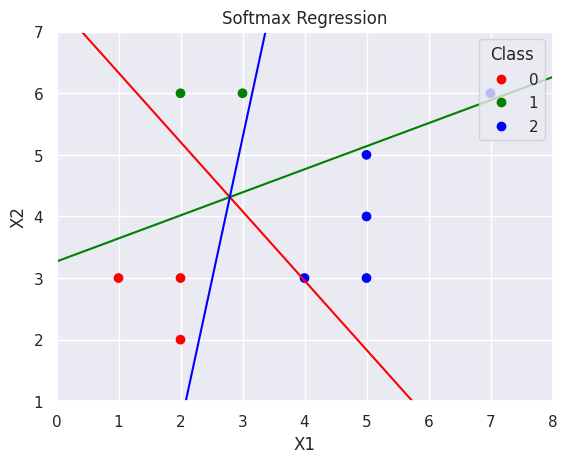

In [792]:
# Plotting the decision boundary
import matplotlib

x1_line = np.array([x1.min() - 1, x1.max() + 1])
boundary_0 = (-softmax.intercept_[0] - (softmax.coef_[0][0] * x1_line)) / softmax.coef_[0][1]
boundary_1 = (-softmax.intercept_[1] - (softmax.coef_[1][0] * x1_line)) / softmax.coef_[1][1]
boundary_2 = (-softmax.intercept_[2] - (softmax.coef_[2][0] * x1_line)) / softmax.coef_[2][1]

fig, ax = plt.subplots()
plt.title('Softmax Regression')
plt.xlabel('X1')
plt.ylabel('X2')
scatter = plt.scatter(x1, x2, c=y_softmax_train, cmap=matplotlib.colors.ListedColormap(["red", "green", "blue"]))
plt.legend(*scatter.legend_elements(),
           loc = 'upper right',
           title = 'Class')
plt.plot(x1_line, boundary_0, color='red')
plt.plot(x1_line, boundary_1, color='green')
plt.plot(x1_line, boundary_2, color='blue')
ax.set_xlim([x1.min() - 1, x1.max() + 1])
ax.set_ylim([x2.min() - 1, x2.max() + 1])
plt.show()

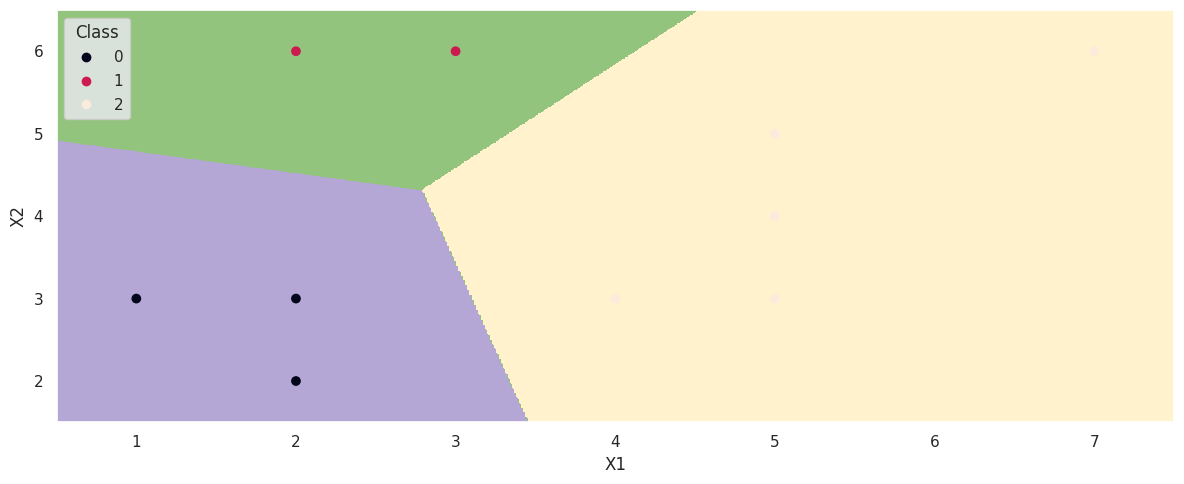

In [793]:
# Plotting the decision boundary using contour plot
x1_mesh, x2_mesh = np.meshgrid(
    np.linspace(x1.min() - 0.5, x1.max() + 0.5, 500).reshape(-1, 1),
    np.linspace(x2.min() - 0.5, x2.max() + 0.5, 500).reshape(-1, 1)
)

X_new = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]
y_pred = softmax.predict(X_new)
zz = y_pred.reshape(x1_mesh.shape)

plt.figure(figsize=(12, 5))
plt.contourf(x1_mesh, x2_mesh, zz, cmap=matplotlib.colors.ListedColormap(['#b4a7d6','#93c47d','#fff2cc']))
scatter = plt.scatter(x1, x2, c=y_softmax_train)
plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Class')
plt.xlabel('X1')
plt.ylabel('X2')

plt.tight_layout()
plt.show()

Performa model softmax regression dievaluasi sama dengan logistic regression, selayaknya classifier. Contohnya adalah akurasi.

Melihat hasil prediksi di atas, kita dapat tahu bahwa model hanya berhasil memprediksi benar sebanyak satu saja. Oleh karena itu, nilai akurasi model logistic regression yang telah kita latih adalah sebesar 1.

In [794]:
# Menampilkan rata-rata akurasi
print("Nilai rata-rata akurasi:", softmax.score(X_test, y_softmax_test))

Nilai rata-rata akurasi: 1.0


### Penjelasan Dataset untuk *Softmax Regression*

Dataset yang digunakan pada bagian softmax regression adalah data terkait gambar dari dry beans. Data didapatkan dari Kaggle dengan beberapa perubahan. Berikut penjelasan masing-masing kolom pada data.

- **Area (A)**: Luas zona kacang dan jumlah piksel dalam batasnya.

- **Perimeter (P)**: Keliling kacang didefinisikan sebagai panjang tepinya.

- **Major axis length (L)**: jarak antara ujung-ujung garis terpanjang yang dapat ditarik dari kacang.

- **Minor axis length (l)**: Garis terpanjang yang dapat ditarik dari kacang sambil berdiri tegak lurus terhadap sumbu utama.

- **Aspect ratio (K)**: Mendefinisikan hubungan antara L dan l.

- **Eccentricity (Ec)**: Eksentrisitas elips yang momennya sama dengan daerah.

- **Convex area (C)**: Jumlah piksel dalam poligon cembung terkecil yang dapat memuat luas biji kacang.

- **Equivalent diameter (Ed)**: Diameter lingkaran yang luasnya sama dengan luas biji kacang.

- **Extent (Ex)**: Rasio piksel dalam kotak pembatas pada area kacang.

- **Solidity (S)**: Soliditas juga dikenal sebagai konveksitas, yaitu rasio piksel pada cangkang cembung dengan piksel pada kacang.

- **Roundness (R)**: Dihitung dengan rumus  (4*pi*A)/(P^2) dengan A adalah Area dan P adalah perimeter

- **Compactness (CO)**: Mengukur kebulatan suatu benda

- **ShapeFactor1 (SF1)**: Ukuran kacang

- **ShapeFactor2 (SF2)**: Ukuran kacang

- **ShapeFactor3 (SF3)**: Ukuran kacang

- **ShapeFactor4 (SF4)**: Ukuran kacang

- **Class**: Jenis Kacang, (0 = Seker, 1 = Barbunya, 2 = Bombay, 3 = Cali, 4 = Dermason, 5 = Horoz, dan 6 = Sira)

**Sumber data dan penjelasan:** https://www.kaggle.com/datasets/whenamancodes/dry-beans-dataset
<br/> <br/>
<img src="https://storage.googleapis.com/kaggle-datasets-images/2048855/3398802/f484410f3cfb3f7f49d1216f57f18850/dataset-cover.jpg?t=2022-04-02-23-21-35" alt="Seker Dry Beans" width=300/>


In [795]:
import pandas as pd

# Import dataset dry beans dan menampilkan 5 row teratas
df_beans = pd.read_csv('dry_beans_dataset.csv')

# Melakukan encoding pada tiap label
df_beans["Class"] = df_beans["Class"].map({
    "SEKER": 0,
    "BARBUNYA": 1,
    "BOMBAY": 2,
    "CALI": 3,
    "DERMASON": 4,
    "HOROZ": 5,
    "SIRA": 6
})

df_beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,0


In [796]:
# Menampilkan informasi keseluruhan terkait dataset
df_beans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  int64  
dtypes: float64(1

#### Soal 6: Softmax Regression

a) Bagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing.

In [797]:
X_softmax = df_beans.drop(["Class"], axis=1) # Independen
y_softmax = df_beans["Class"] # Dependen

X_softmax_train, X_softmax_test, y_softmax_train, y_softmax_test = train_test_split(X_softmax, y_softmax, test_size = 0.2, stratify=y_softmax, random_state = 123)

b) Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal. Latih terlebih dahulu scaler menggunakan training set, lalu scale untuk kedua training dan testing set

In [798]:
exclude_cols = []

X_softmax_train_scaled, X_softmax_test_scaled, _ = scale_train_and_test_df(X_softmax_train, X_softmax_test, exclude_columns=exclude_cols)

X_softmax_train_scaled

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
3144,0.257376,0.416108,0.325009,0.467124,0.194501,0.604721,0.255203,0.389719,0.720938,0.805031,0.613003,0.680500,0.231574,0.352919,0.634192,0.953508
3475,0.587978,0.704888,0.693399,0.680646,0.418002,0.816612,0.578827,0.703944,0.760118,0.920720,0.708842,0.416818,0.111814,0.092861,0.365044,0.881058
5474,0.336866,0.482113,0.520508,0.429930,0.525998,0.873491,0.333521,0.475646,0.737381,0.825425,0.704318,0.312454,0.264435,0.118880,0.266698,0.793193
4200,0.206942,0.348293,0.364759,0.311002,0.477459,0.850149,0.207074,0.329964,0.751440,0.682224,0.654302,0.355405,0.375052,0.200999,0.306610,0.792042
4637,0.233230,0.382339,0.430928,0.305109,0.603863,0.905012,0.229508,0.361697,0.740730,0.914949,0.641405,0.251738,0.379167,0.135609,0.211617,0.856158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838,0.224369,0.383854,0.346953,0.366787,0.356678,0.774716,0.223257,0.351151,0.651980,0.757230,0.580588,0.479003,0.316169,0.256393,0.425849,0.866054
964,0.080117,0.137956,0.123894,0.219622,0.183560,0.588375,0.078512,0.151739,0.792585,0.931915,0.914625,0.697408,0.482635,0.599696,0.652461,0.981954
8374,0.097393,0.178261,0.197720,0.190213,0.388087,0.797232,0.095852,0.179260,0.787013,0.895962,0.799578,0.451621,0.528403,0.366943,0.398872,0.962834
12702,0.065122,0.117125,0.125912,0.166100,0.280386,0.708332,0.063969,0.126684,0.741121,0.903468,0.891817,0.570818,0.569251,0.520753,0.518639,0.957401


c) Buatlah suatu model softmax regression berdasarkan data yang telah dinormalisasi serta tampilkan `confusion matrix` dan `hasil evaluasi metriknya` pada testing set.

> Catatan: Jika menemukan warning `ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT`, atur parameter max_iter pada LogisticRegression untuk menambah banyak iterasi agar algoritma dapat melakukan proses konvergensi dengan baik.

>`hasil evaluasi metriknya` mencakup:
* F1 Macro Average,
* F1 Micro Average,
* Precision Macro Average
* Precision Micro Average
* Recall Macro Average
* Recall Micro Average

In [799]:
softmax = LogisticRegression(multi_class='multinomial', max_iter=400)
softmax.fit(X_softmax_train_scaled, y_softmax_train)

y_softmax_predict = softmax.predict(X_softmax_test_scaled)

evaluate_classifier_performance(y_softmax_predict, y_softmax_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       406
           1       0.96      0.84      0.90       265
           2       1.00      1.00      1.00       104
           3       0.91      0.95      0.93       326
           4       0.90      0.90      0.90       709
           5       0.94      0.96      0.95       386
           6       0.83      0.86      0.84       527

    accuracy                           0.91      2723
   macro avg       0.93      0.92      0.92      2723
weighted avg       0.91      0.91      0.91      2723



Confusion Matrix



prediction,0,1,2,3,4,5,6
actual,,,,,,,
0,374,3,0,0,10,1,18
1,4,223,0,21,0,2,15
2,0,0,104,0,0,0,0
3,0,4,0,310,0,5,7
4,15,1,0,0,639,2,52
5,0,0,0,8,5,369,4
6,6,1,0,1,54,12,453




Hasil Evaluasi metricnya: 
F1 Macro Average: 0.9216039431595008
F1 Micro Average: 0.9078222548659567
Precision Macro Average: 0.9259611372969355
Precision Micro Average: 0.9078222548659567
Recall Macro Average: 0.9186317758285961
Recall Micro Average: 0.9078222548659567



d) Berikan analisis mengenai perbedaan antara regresi softmax dengan regresi logistik.

Softmax regression adalah model yang merupakan modifikasi dari logistic regression. Pada model ini, output dapat memiliki nilai lebih dari dua buah. Sehingga, softmax regression disebut sebagai multiclass classification. Sehingga dapat dikatakan bahwa regresi softmax adalah salah satu cara untuk mengimplementasikan klasifikasi yang memiliki beberapa kelas kategori. Sedangkan regresi logistik merupakan model yang digunakan untuk menyelesaikan permasalahan klasifikasi biner (misalnya mmemiliki kelas seperti Ya/Tidak, Belum/Pernah, Diterima/Ditolak, dsb).

Sehingga dapat dikatakan bahwa model softmax dengan 2 kelas kategori sama saja dengan model regresi logistik. Berdasarkan [StackOverflow](https://stackoverflow.com/questions/36051506/difference-between-logistic-regression-and-softmax-regression), perbedaan besarnya terdapat pada *naming convention* (penamaannya), dimana kita menamakan model kita sebagai regresi logistik apabila kita sedang menyelesaikan masalah klasifikasi yang mencangkup 2 kategori dan dinamakan softmax apabila kita menyelesaikan masalah klasifikasi *multinational* (lebih dari 2 kelas kategori).

## Kompetisi Kaggle Regresi Berdasarkan Linear Models

Dalam rangka menerapkan pemahaman kalian pada materi model linear untuk kasus regresi serta sebagai sarana untuk **mendapatkan nilai tambahan**, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 6 ini.

**Bagaimana Cara Mengikuti?**
*   Kalian akan menemukan tautan ke kompetisi di bagian bawah section ini atau kalian juga dapat mengaksesnya melalui laman course KASDAD pada SCELE. Klik tautan tersebut untuk mengakses halaman kompetisi.
*   Kerjakan solusi Anda menggunakan notebook ini.
*   Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.

**Tautan Kaggle Competition**
*   [Kaggle Competition Linear Model for Regression](https://www.kaggle.com/t/09051471139246639e739754ced8691a)

**Nilai Bonus**

Penentuan peserta yang mendapatkan nilai bonus akan ditentukan sesuai dengan peringkat dari masing-masing peserta di leaderboard, semakin tinggi peringkat kalian, semakin besar nilai bonus yang akan kalian dapatkan.

In [800]:
df_co2 = pd.read_csv('co2_emissions_train.csv')
df_co2.head()

,Id,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions
0,6125,MAZDA,CX-5,SUV - SMALL,2.5,4,AS6,X,9.7,7.8,8.8,32,206
1,725,MERCEDES-BENZ,B 250,STATION WAGON - SMALL,2.0,4,AS7,Z,9.2,6.6,8.0,35,184
2,967,SUBARU,XV CROSSTREK AWD,SUV - SMALL,2.0,4,AV,X,9.5,7.2,8.5,33,196
3,1107,AUDI,A7 QUATTRO TDI (modified),MID-SIZE,3.0,6,AS8,D,9.8,6.2,8.1,35,217
4,290,CHRYSLER,300 SRT (MDS),FULL-SIZE,6.4,8,A5,Z,16.7,10.3,13.8,20,317


In [801]:
def change_transmission(df: pd.DataFrame):
  df["Transmission"] = df["Transmission"].astype(str)
  df[['Transmission_name', 'Transmission_number']] = df['Transmission'].str.extract(r'([A-Z]+)(\d*)')

  df['Transmission_number'] = df['Transmission_number'].replace('', '0')

  df["Transmission_number"] = df['Transmission_number'].astype(int)

  df.drop("Transmission", axis=1, inplace = True)

change_transmission(df_co2)
df_co2.head()

,Id,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions,Transmission_name,Transmission_number
0,6125,MAZDA,CX-5,SUV - SMALL,2.5,4,X,9.7,7.8,8.8,32,206,AS,6
1,725,MERCEDES-BENZ,B 250,STATION WAGON - SMALL,2.0,4,Z,9.2,6.6,8.0,35,184,AS,7
2,967,SUBARU,XV CROSSTREK AWD,SUV - SMALL,2.0,4,X,9.5,7.2,8.5,33,196,AV,0
3,1107,AUDI,A7 QUATTRO TDI (modified),MID-SIZE,3.0,6,D,9.8,6.2,8.1,35,217,AS,8
4,290,CHRYSLER,300 SRT (MDS),FULL-SIZE,6.4,8,Z,16.7,10.3,13.8,20,317,A,5


In [802]:
df_co2.groupby("Make").describe()

Id                                                     \
               count         mean          std     min      25%     50%   
Make                                                                      
ACURA           50.0  3144.580000  2322.208345     0.0  1075.25  3319.5   
ALFA ROMEO      26.0  4708.923077  1750.078945    12.0  3590.50  5467.5   
ASTON MARTIN    36.0  2563.638889  2039.317913    13.0  1084.75  2215.0   
AUDI           241.0  2835.987552  2160.882064    20.0  1110.00  2255.0   
BENTLEY         40.0  3015.350000  2085.996860    69.0  1153.75  3368.5   
BMW            424.0  3298.792453  2091.609325    79.0  1230.75  3393.5   
BUGATTI          2.0  6107.500000   753.068722  5575.0  5841.25  6107.5   
BUICK           83.0  3230.987952  2084.897567   140.0  1264.50  3450.0   
CADILLAC       118.0  3196.423729  2179.322271   156.0  1280.25  3464.5   
CHEVROLET      474.0  3390.050633  2154.944389   188.0  1342.25  3514.5   
CHRYSLER        74.0  2673.121622  1952.369000   274.0  1373.25  2495.5   
DODGE          187.0  3197.165775  2053.011973   293.0  1411.50  2541.0   
FIAT            56.0  2930.125000  1717.332520   332.0  1439.75  2556.5   
FORD           509.0  3671.534381  2017.828921   342.0  2562.00  3692.0   
GENESIS         18.0  5595.055556  1036.127205  3732.0  4804.25  5830.0   
GMC            245.0  3828.024490  2128.766677   432.0  1559.00  3767.0   
HONDA          170.0  4174.105882  2058.036788   481.0  2709.50  4857.5   
HYUNDAI        180.0  3828.744444  2171.259957   502.0  1607.50  3830.5   
INFINITI        84.0  3217.976190  2029.798453   527.0  1627.75  2768.5   
JAGUAR         117.0  3898.709402  2170.179037   547.0  1659.00  3878.0   
JEEP           210.0  3772.780952  2122.029646   569.0  1689.25  3895.5   
KIA            184.0  3604.586957  2109.088064   602.0  1725.75  3921.0   
LAMBORGHINI     36.0  4630.611111  1872.489287   638.0  3687.25  5027.5   
LAND ROVER      67.0  4131.761194  2662.342225   640.0  1746.50  5034.0   
LEXUS          140.0  4014.478571  2094.586161   659.0  1780.75  3979.5   
LINCOLN         78.0  4000.423077  2072.300093   681.0  2916.25  3995.5   
MASERATI        47.0  4447.255319  2107.055286   692.0  2936.50  5079.0   
MAZDA          138.0  3993.731884  2125.253261   702.0  1823.00  4029.0   
MERCEDES-BENZ  331.0  4070.803625  2059.517316   725.0  1877.50  4082.0   
MINI           156.0  3732.474359  2055.127958   786.0  1907.75  4106.5   
MITSUBISHI      76.0  3659.723684  2037.013046   820.0  1933.75  3598.0   
NISSAN         210.0  4118.047619  2041.743091   836.0  1975.25  4170.5   
PORSCHE        305.0  4001.186885  1989.808772   869.0  2023.00  4207.0   
RAM             72.0  4162.166667  2217.411548   914.0  2050.50  4240.5   
ROLLS-ROYCE     46.0  4199.913043  2211.716687   927.0  2063.25  4249.5   
SCION           17.0  1931.529412   964.451925   934.0   938.00  2068.0   
SMART            5.0  2067.800000  1123.003874   943.0   944.00  2073.0   
SRT              1.0   946.000000          NaN   946.0   946.00   946.0   
SUBARU         119.0  4107.268908  2144.072818   947.0  2087.50  4260.0   
TOYOTA         278.0  4158.985612  2131.476627   970.0  2124.25  4293.0   
VOLKSWAGEN     157.0  3630.751592  2104.026752  1019.0  2150.00  3272.0   
VOLVO          101.0  4313.633663  1847.923130  1060.0  3290.00  4355.0   

                               Engine Size(L)            ... CO2 Emissions  \
                   75%     max          count      mean  ...           75%   
Make                                                     ...                 
ACURA          5455.50  6511.0           50.0  3.030000  ...        244.00   
ALFA ROMEO     6253.00  6519.0           26.0  2.188462  ...        259.75   
ASTON MARTIN   4389.50  6522.0           36.0  5.263889  ...        356.75   
AUDI           4422.00  6558.0          241.0  2.913693  ...        269.00   
BENTLEY        4436.25  6565.0           40.0  5.390000  ...        389.00   
BMW            551

In [803]:
df_co2.groupby("Model").describe()

Id                                                              \
           count         mean          std     min      25%     50%      75%   
Model                                                                          
124 SPIDER   3.0  3971.666667   613.434865  3617.0  3617.50  3618.0  4149.00   
124 Spider   3.0  6078.333333   602.465213  5730.0  5730.50  5731.0  6252.50   
1500         7.0  4976.428571  1693.252773  2041.0  4238.50  5332.0  5855.50   
1500 (MDS)   6.0  2042.166667  1007.128476   914.0  1197.50  2045.5  2886.00   
1500 4X4     4.0  4453.500000  2148.458440  2049.0  3694.50  4243.5  5002.50   
...          ...          ...          ...     ...      ...     ...      ...   
iM           2.0  3185.500000     0.707107  3185.0  3185.25  3185.5  3185.75   
iQ           2.0  1501.500000   799.737770   936.0  1218.75  1501.5  1784.25   
tC           6.0  2064.500000  1006.235509   937.0  1220.50  2068.5  2907.50   
xB           3.0  1693.333333   653.272021   939.0  1504.50  2070.0  2070.50   
xD           1.0   942.000000          NaN   942.0   942.00   942.0   942.00   

                   Engine Size(L)         ... CO2 Emissions         \
               max          count   mean  ...           75%    max   
Model                                     ...                        
124 SPIDER  4680.0            3.0  1.400  ...        187.00  187.0   
124 Spider  6774.0            3.0  1.400  ...        186.00  187.0   
1500        7274.0            7.0  5.400  ...        333.00  346.0   
1500 (MDS)  3167.0            6.0  5.700  ...        340.00  348.0   
1500 4X4    7278.0            4.0  5.175  ...        336.25  361.0   
...            ...            ...    ...  ...           ...    ...   
iM          3186.0            2.0  1.800  ...        178.25  180.0   
iQ          2067.0            2.0  1.300  ...        146.00  147.0   
tC          3188.0            6.0  2.500  ...        209.25  211.0   
xB          2071.0            3.0  2.400  ...        226.50  228.0   
xD           942.0            1.0  1.800  ...        182.00  182.0   

           Transmission_number                                                 
                         count      mean       std  min   25%  50%   75%  max  
Model                                                                          
124 SPIDER                 3.0  6.000000  0.000000  6.0  6.00  6.0  6.00  6.0  
124 Spider                 3.0  6.000000  0.000000  6.0  6.00  6.0  6.00  6.0  
1500                       7.0  7.428571  0.975900  6.0  7.00  8.0  8.00  8.0  
1500 (MDS)                 6.0  7.000000  1.095445  6.0  6.00  7.0  8.00  8.0  
1500 4X4                   4.0  7.500000  1.000000  6.0  7.50  8.0  8.00  8.0  
...                        ...       ...       ...  ...   ...  ...   ...  ...  
iM                         2.0  6.500000  0.707107  6.0  6.25  6.5  6.75  7.0  
iQ                         2.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0  
tC                         6.0  6.000000  0.000000  6.0  6.00  6.0  6.00  6.0  
xB                         3.0  4.333333  0.577350  4.0  4.00  4.0  4.50  5.0  
xD                         1.0  5.000000       NaN  5.0  5.00  5.0  5.00  5.0  

[1924 rows x 72 columns]

In [804]:
df_co2.groupby("Vehicle Class").describe()

Id                                            \
                          count         mean          std    min      25%   
Vehicle Class                                                               
COMPACT                   815.0  3302.950920  2052.858343    0.0  1585.50   
FULL-SIZE                 501.0  3689.000000  2167.088895   34.0  1710.00   
MID-SIZE                  917.0  3527.982552  2145.539282    5.0  1620.00   
MINICOMPACT               260.0  3676.638462  2019.275672   13.0  1993.75   
MINIVAN                    63.0  3322.015873  2002.165702  291.0  1728.50   
PICKUP TRUCK - SMALL      130.0  4030.823077  1858.873400  844.0  2408.50   
PICKUP TRUCK - STANDARD   428.0  4182.051402  2088.870274  237.0  2584.75   
SPECIAL PURPOSE VEHICLE    60.0  4039.800000  2042.203810  428.0  2647.75   
STATION WAGON - MID-SIZE   46.0  4055.478261  2147.172608  622.0  1963.25   
STATION WAGON - SMALL     214.0  3864.219626  2054.673899   38.0  2169.25   
SUBCOMPACT                492.0  3801.321138  2099.830903   14.0  1911.25   
SUV - SMALL               974.0  3948.043121  2115.399756    3.0  2147.00   
SUV - STANDARD            583.0  3834.394511  2170.241756   43.0  1857.00   
TWO-SEATER                359.0  3562.406685  2149.726453   12.0  1785.50   
VAN - CARGO                17.0   302.294118   101.584795  210.0   214.00   
VAN - PASSENGER            49.0  2042.387755  1902.803631  220.0   446.00   

                                                  Engine Size(L)            \
                             50%      75%     max          count      mean   
Vehicle Class                                                                
COMPACT                   3207.0  4769.50  7373.0          815.0  2.481104   
FULL-SIZE                 3732.0  5559.00  7360.0          501.0  3.741317   
MID-SIZE                  3461.0  5376.00  7375.0          917.0  2.864667   
MINICOMPACT               3620.5  5289.75  7313.0          260.0  2.981923   
MINIVAN                   3238.0  4779.50  7350.0           63.0  3.411111   
PICKUP TRUCK - SMALL      4235.0  5566.00  7355.0          130.0  3.125385   
PICKUP TRUCK - STANDARD   4718.5  5786.25  7357.0          428.0  4.458411   
SPECIAL PURPOSE VEHICLE   3862.5  5824.25  7284.0           60.0  2.291667   
STATION WAGON - MID-SIZE  4330.5  5985.25  7286.0           46.0  3.180435   
STATION WAGON - SMALL     3934.0  5445.75  7378.0          214.0  1.936449   
SUBCOMPACT                3848.5  5544.25  7229.0          492.0  3.087805   
SUV - SMALL               3914.5  5913.00  7382.0          974.0  2.503080   
SUV - STANDARD            3782.0  5722.50  7384.0          583.0  4.281132   
TWO-SEATER                3366.0  5312.50  7336.0          359.0  3.693315   
VAN - CARGO                218.0   434.00   439.0           17.0  5.105882   
VAN - PASSENGER           1508.0  3524.00  6836.0           49.0  5.142857   

                          ... CO2 Emissions        Transmission_number  \
                          ...           75%    max               count   
Vehicle Class             ...                                            
COMPACT                   ...        241.50  404.0               815.0   
FULL-SIZE                 ...        295.00  404.0               501.0   
MID-SIZE                  ...        251.00  465.0               917.0   
MINICOMPACT               ...        260.00  365.0               260.0   
MINIVAN                   ...        275.50  296.0                63.0   
PICKUP TRUCK - SMALL      ...        297.25  331.0               130.0   
PICKUP TRUCK - STANDARD   ...        324.00  414.0               428.0   
SPECIAL PURPOSE VEHICLE   ...        251.00  298.0                60.0   
STATION WAGON - MID-SIZE  ...        253.75  386.0                46.0   
STATION WAGON - SMALL     ...        216.00  382.0               214.0   
SUBCOMPACT                ...        282.00  392.0               492.0   
SUV - SMALL               ...        257.00  3

In [805]:
df_co2.groupby("Fuel Type").describe()

Id                                                              \
            count         mean          std     min      25%     50%      75%   
Fuel Type                                                                       
D           144.0  3522.520833  2155.174291    28.0  1863.50  3385.5  5635.75   
E           294.0  2907.452381  2033.715724   180.0  1329.75  2600.0  4665.50   
N             1.0  2439.000000          NaN  2439.0  2439.00  2439.0  2439.00   
X          2921.0  3740.081479  2105.295793   140.0  1957.00  3725.0  5591.00   
Z          2548.0  3750.486656  2146.940404     0.0  1914.75  3870.5  5544.25   

                  Engine Size(L)            ... CO2 Emissions         \
              max          count      mean  ...           75%    max   
Fuel Type                                   ...                        
D          7276.0          144.0  2.572222  ...        270.00  326.0   
E          6899.0          294.0  4.127551  ...        298.75  418.0   
N          2439.0            1.0  3.600000  ...        213.00  213.0   
X          7379.0         2921.0  2.807600  ...        273.00  488.0   
Z          7384.0         2548.0  3.475510  ...        302.00  522.0   

          Transmission_number                                                
                        count      mean       std  min  25%  50%  75%   max  
Fuel Type                                                                    
D                       144.0  7.562500  1.283127  6.0  6.0  8.0  8.0  10.0  
E                       294.0  6.598639  1.330451  4.0  6.0  6.0  8.0  10.0  
N                         1.0  6.000000       NaN  6.0  6.0  6.0  6.0   6.0  
X                      2921.0  5.958576  2.137883  0.0  6.0  6.0  6.0  10.0  
Z                      2548.0  7.310047  1.017527  0.0  6.0  7.0  8.0  10.0  

[5 rows x 72 columns]

In [806]:
# Looking data characteristics

print("Jumlah baris : ", df_co2.shape[0])
print("Jumlah kolom : ", df_co2.shape[1])

print(df_co2.info())

Jumlah baris :  5908
Jumlah kolom :  14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5908 entries, 0 to 5907
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Id                                5908 non-null   int64  
 1   Make                              5908 non-null   object 
 2   Model                             5908 non-null   object 
 3   Vehicle Class                     5908 non-null   object 
 4   Engine Size(L)                    5908 non-null   float64
 5   Cylinders                         5908 non-null   int64  
 6   Fuel Type                         5908 non-null   object 
 7   Fuel Consumption City (L/100 km)  5908 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   5908 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  5908 non-null   float64
 10  Fuel Consumption Comb (mpg)       5908 non-null   int64  
 11  CO2 Emissions                

In [807]:
df_co2.drop("Model", axis = 1, inplace = True)

Tidak ditemukan missing value pada dataset
Duplicates value on dataset: 0
Duplicates value on dataset: 0
Outlier pada tiap atribut:
CO2 Emissions                        67
Cylinders                           169
Engine Size(L)                      120
Fuel Consumption City (L/100 km)    100
Fuel Consumption Comb (L/100 km)    109
Fuel Consumption Comb (mpg)          95
Fuel Consumption Hwy (L/100 km)     166
Fuel Type                             0
Id                                    0
Make                                  0
Transmission_name                     0
Transmission_number                 242
Vehicle Class                         0
dtype: int64
{'CO2 Emissions': 67, 'Cylinders': 169, 'Engine Size(L)': 120, 'Fuel Consumption City (L/100 km)': 100, 'Fuel Consumption Comb (L/100 km)': 109, 'Fuel Consumption Comb (mpg)': 95, 'Fuel Consumption Hwy (L/100 km)': 166, 'Fuel Type': 0, 'Id': 0, 'Make': 0, 'Transmission_name': 0, 'Transmission_number': 242, 'Vehicle Class': 0}
Boxplot

<ipython-input-737-8e34504938d9>:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-737-8e34504938d9>:7: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-737-8e34504938d9>:15: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < lower_limit) | (df > upper_limit)


Removing Outliers using 3 Standard Deviation
======================  ==========  =======  ================================  =============  =============
Outlier (Previously)    Outliers      Count  Column                              Lower Limit    Upper Limit
======================  ==========  =======  ================================  =============  =============
False                   False                Id                                     -2687.71        10082.9
True                    True              6  Engine Size(L)                        -0.920004        7.23148
True                    True            132  Cylinders                             0.0769057        11.1458
True                    True             42  Fuel Consumption City (L/100 km)        2.02202          23.08
True                    True             56  Fuel Consumption Hwy (L/100 km)         2.38854        15.6848
True                    True             46  Fuel Consumption Comb (L/100 km)        2.2909

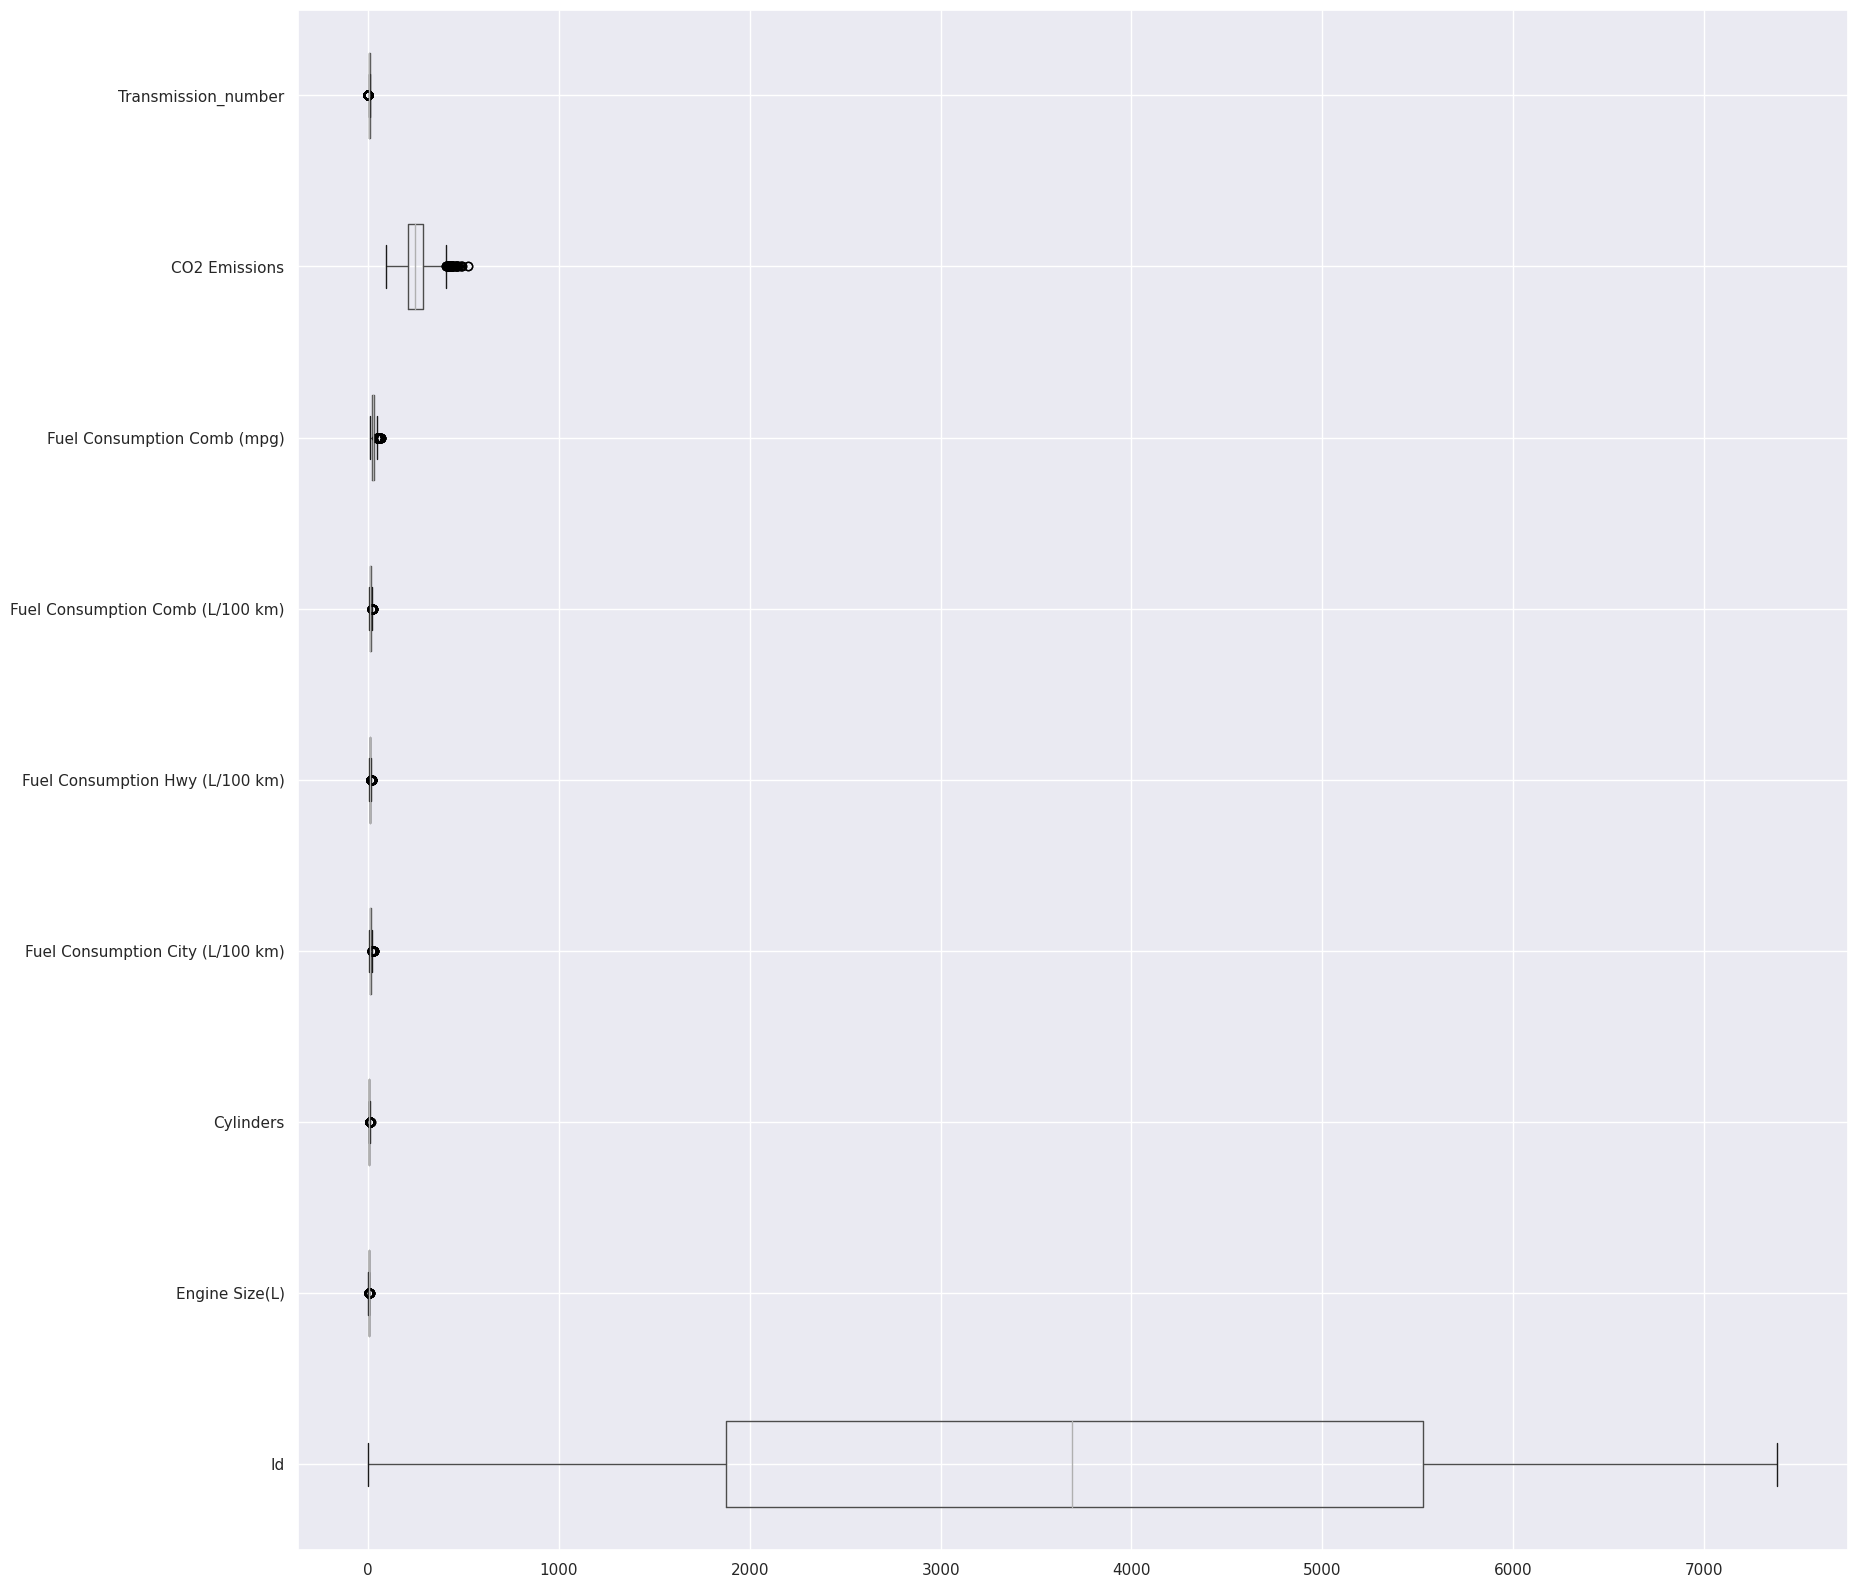

In [808]:
columns_to_label_encode = [
    # "Make", "Vehicle Class", "Fuel Type", "Transmission_name"
]
columns_to_one_hot_encode = ["Make", "Vehicle Class", "Fuel Type", "Transmission_name"]

preprocess(df_co2, "nah", "CO2 Emissions", columns_to_label_encode, columns_to_one_hot_encode)

In [809]:
# Label Encoding

def automatic_label_encode_df(df, columns_to_label_encode):
  le = LabelEncoder()

  for col in columns_to_label_encode:
    df[col] = le.fit_transform(df[col]) # label encoding

# automatic_label_encode_df(df_co2, columns_to_label_encode)

df_co2 = one_hot_encode_df(df_co2, columns_to_one_hot_encode)

df_co2.drop("Fuel Type_N", axis = 1, inplace = True)

In [810]:
from sklearn.model_selection import GridSearchCV

y_co2 = df_co2["CO2 Emissions"] # Dependen

X_co2 = df_co2.drop(["CO2 Emissions", "Id"], axis = 1) # Independen

X_co2_train, X_co2_test, y_co2_train, y_co2_test = train_test_split(X_co2, y_co2, test_size = 0.2, random_state = 123)

X_co2_train_scaled, X_co2_test_scaled, scaler_kaggle = scale_train_and_test_df(X_co2_train, X_co2_test, exclude_columns=columns_to_label_encode)

def cross_val_kaggle(model, X, y):
    scores = cross_val_score(model, X, y, scoring='r2', cv=5)
    return scores.mean()

linear_reg = LinearRegression()
lasso_reg = Lasso(max_iter = 1000)
ridge_reg = Ridge(max_iter = 1000)

linear_reg.fit(X_co2_train_scaled, y_co2_train)

# Predicting with Linear Regression
y_co2_predict_linear = linear_reg.predict(X_co2_test_scaled)

# Evaluating Linear Regression
evaluate_metric(y_co2_test, y_co2_predict_linear)

lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}  # Example alpha values for Lasso
lasso_grid = GridSearchCV(lasso_reg, param_grid=lasso_params, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(X_co2_train_scaled, y_co2_train)

# Predicting with Lasso Regression
lasso_reg_best = Lasso(alpha=lasso_grid.best_params_['alpha'])
lasso_reg_best.fit(X_co2_train_scaled, y_co2_train)
y_co2_predict_lasso = lasso_reg_best.predict(X_co2_test_scaled)

print("Best Lasso Parameters:", lasso_grid.best_params_)
evaluate_metric(y_co2_test, y_co2_predict_lasso)

# Fitting Ridge Regression
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}  # Example alpha values for Ridge
ridge_grid = GridSearchCV(ridge_reg, param_grid=ridge_params, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_co2_train_scaled, y_co2_train)

# Predicting with Ridge Regression
ridge_reg_best = Ridge(alpha=1)
ridge_reg_best.fit(X_co2_train_scaled, y_co2_train)
y_co2_predict_ridge = ridge_reg_best.predict(X_co2_test_scaled)

print("Best Ridge Parameters:", ridge_grid.best_params_)
evaluate_metric(y_co2_test, y_co2_predict_ridge)

print(y_co2_predict_ridge)

MSE: 16.155855437018946
MAE: 2.65768262214467
RMSE: 4.019434716103615
R-squared: 0.9953844770234536

############################################################



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.979e+04, tolerance: 1.270e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.323e+04, tolerance: 1.289e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.250e+04, tolerance: 1.325e

Best Lasso Parameters: {'alpha': 0.001}
MSE: 15.909051770941979
MAE: 2.643462597740152
RMSE: 3.9886152698576955
R-squared: 0.9954549857003797

############################################################

Best Ridge Parameters: {'alpha': 0.01}
MSE: 17.22005282669623
MAE: 2.7873651067213063
RMSE: 4.149705149368595
R-squared: 0.9950804493275643

############################################################

[279.11725548 225.49971434 300.6087657  ... 290.78326816 265.19637405
 248.22758653]


Tidak ditemukan missing value pada dataset
Duplicates value on dataset: 0
Duplicates value on dataset: 0
Outlier pada tiap atribut:
Cylinders                           27
Engine Size(L)                      17
Fuel Consumption City (L/100 km)    32
Fuel Consumption Comb (L/100 km)    33
Fuel Consumption Comb (mpg)         24
Fuel Consumption Hwy (L/100 km)     36
Fuel Type                            0
Id                                   0
Make                                 0
Transmission_name                    0
Transmission_number                 53
Vehicle Class                        0
dtype: int64
{'Cylinders': 27, 'Engine Size(L)': 17, 'Fuel Consumption City (L/100 km)': 32, 'Fuel Consumption Comb (L/100 km)': 33, 'Fuel Consumption Comb (mpg)': 24, 'Fuel Consumption Hwy (L/100 km)': 36, 'Fuel Type': 0, 'Id': 0, 'Make': 0, 'Transmission_name': 0, 'Transmission_number': 53, 'Vehicle Class': 0}
Boxplot Old


<ipython-input-737-8e34504938d9>:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-737-8e34504938d9>:7: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-737-8e34504938d9>:15: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < lower_limit) | (df > upper_limit)


Removing Outliers using 3 Standard Deviation
======================  ==========  =======  ================================  =============  =============
Outlier (Previously)    Outliers      Count  Column                              Lower Limit    Upper Limit
======================  ==========  =======  ================================  =============  =============
False                   False                Id                                     -2770.86          10110
True                    True              2  Engine Size(L)                        -0.832711        7.18748
True                    True             22  Cylinders                              0.345982        10.9133
True                    True             14  Fuel Consumption City (L/100 km)        2.18798        22.9691
True                    True             19  Fuel Consumption Hwy (L/100 km)         2.28652        15.8372
True                    True             18  Fuel Consumption Comb (L/100 km)        2.3213

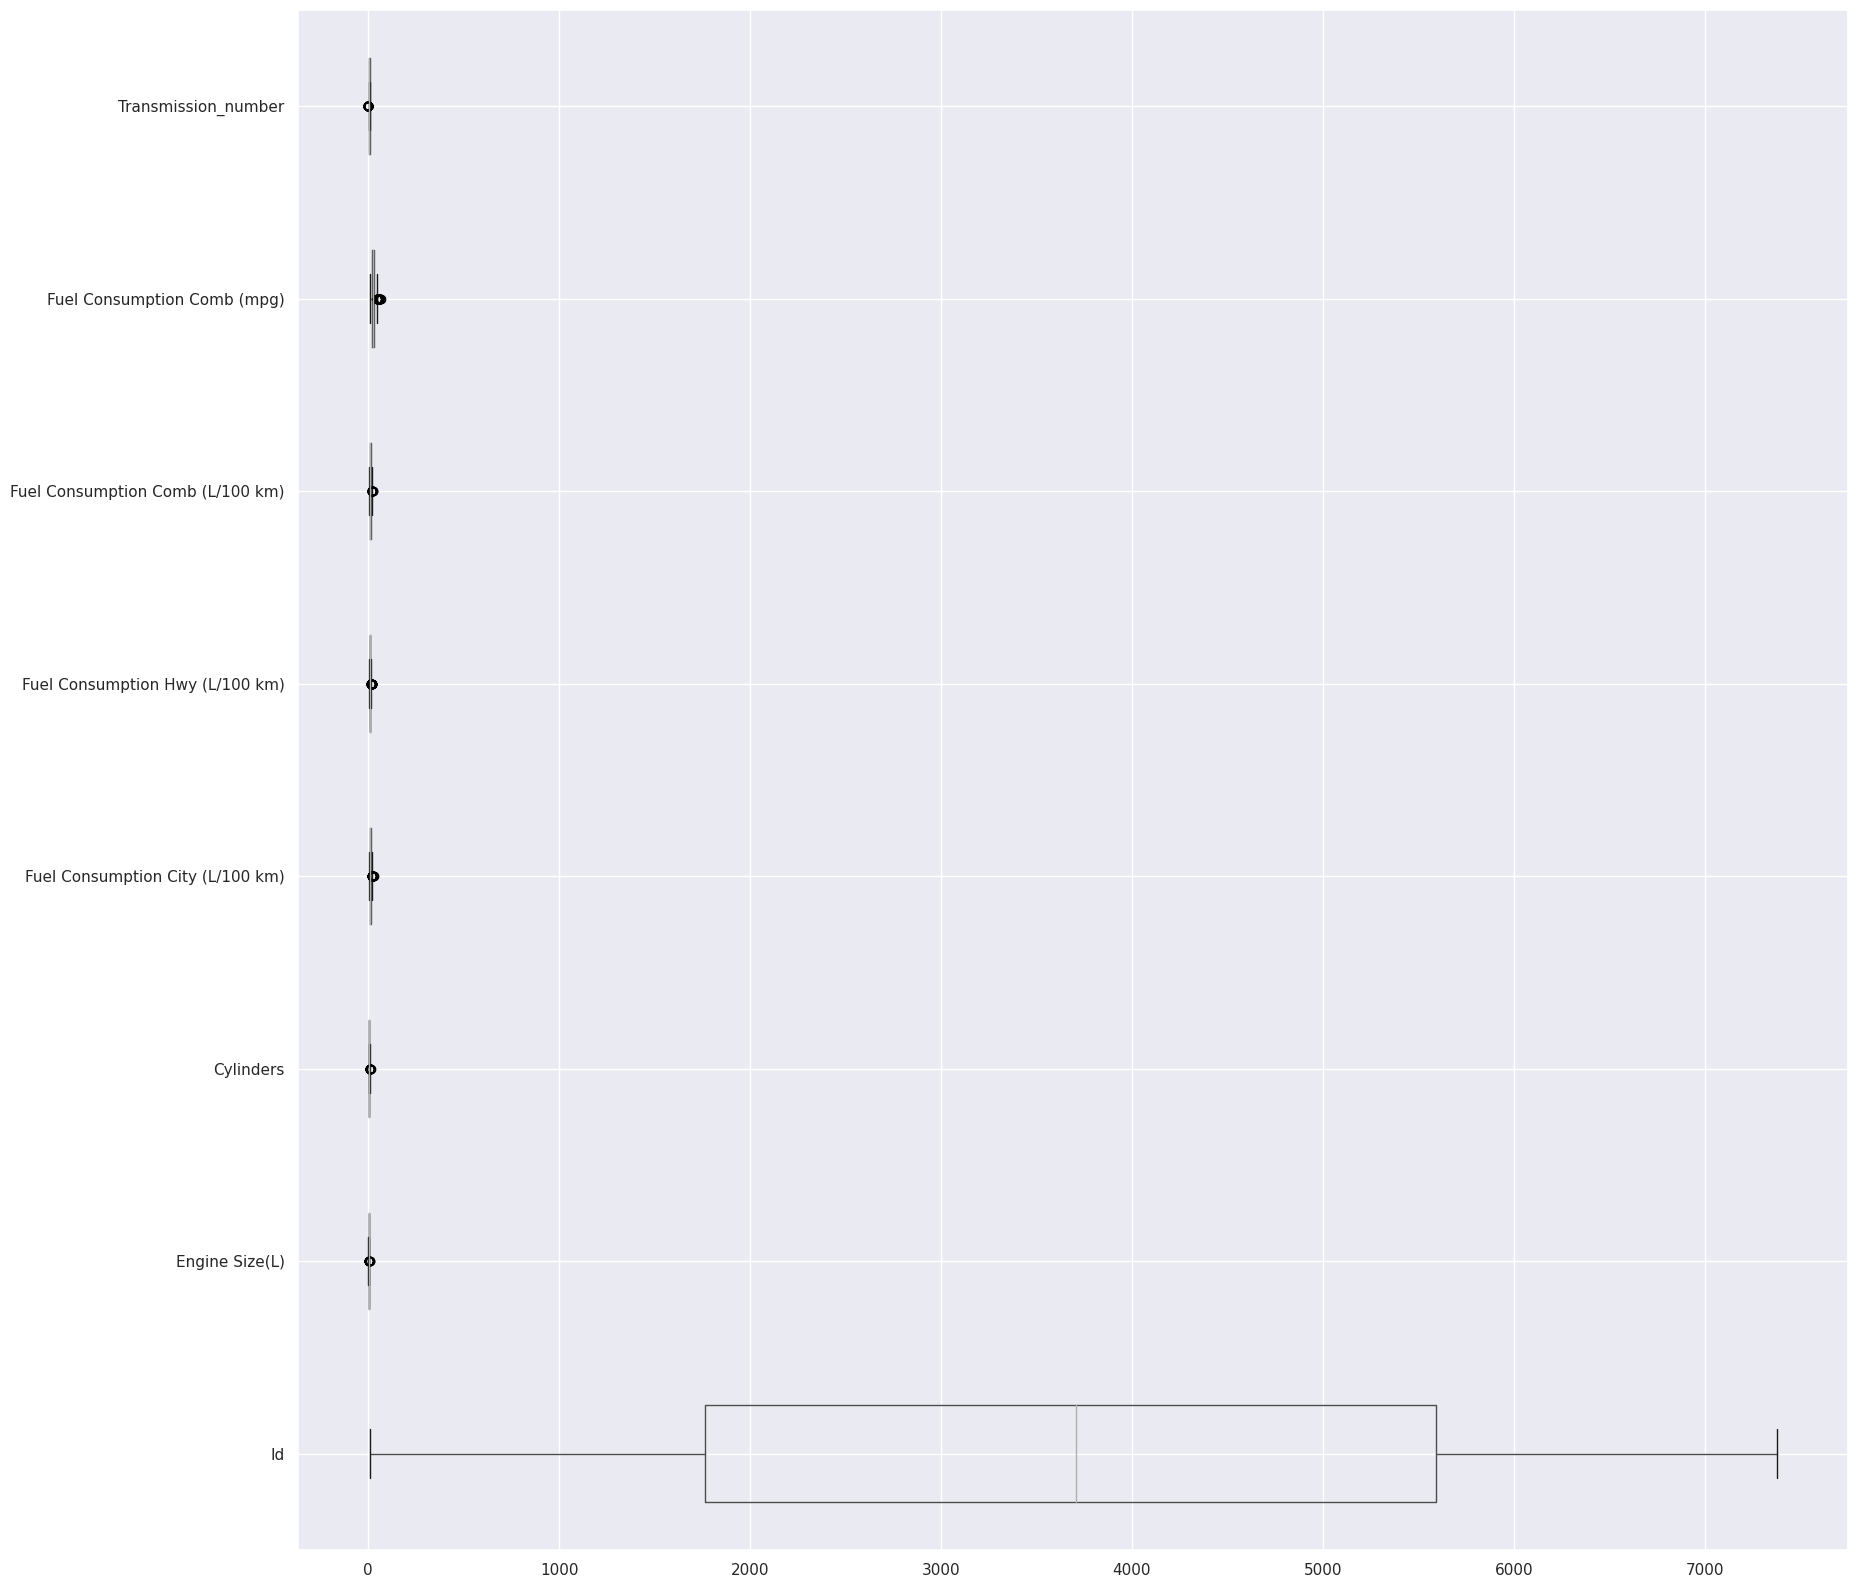

In [812]:
co2_test = pd.read_csv('co2_emissions_test.csv')

change_transmission(co2_test)
co2_test.drop("Model", axis = 1, inplace = True)

df_test = co2_test[['Id']].copy()

preprocess(co2_test, "nah", "CO2 Emissions", columns_to_label_encode, columns_to_one_hot_encode)

# automatic_label_encode_df(co2_test, columns_to_label_encode)
co2_test = one_hot_encode_df(co2_test, columns_to_one_hot_encode)

X_co2_kaggle = co2_test.drop(columns=["Id"])

columns_to_scale_kaggle = [col for col in X_co2_kaggle.columns if col not in columns_to_one_hot_encode]

X_co2_kaggle[columns_to_scale_kaggle] = scaler_kaggle.transform(X_co2_kaggle[columns_to_scale_kaggle])

prediction = lasso_reg_best.predict(X_co2_kaggle)

df_test['CO2 Emissions'] = prediction

df_test.to_csv('co2_kaggle.csv', index=False)